<h1 style="text-align: center;">Clima em Jena, Alemanha</h1>

# 1. Introdução sobre o tema

Jena é uma cidade localizada na Alemanha, estando cerca de 260 km a sudoeste da capital, Berlim (https://pt.wikipedia.org/wiki/Jena). O país está localizado na Zona Temperada Norte, com clima quente e temperado e com uma pluviosidade significativa ao longo do ano (https://pt.climate-data.org/europa/alemanha/thuringia/jena-2131/). Como o país está nessa região, o verão começa no fim de junho e termina em setembro. Sabe-se que em julho há a maioria da precipitação, com média de 76 mm, e é considerado o mês mais quente em Jena, com temperatura média de 18.7°C (https://pt.climate-data.org/europa/alemanha/thuringia/jena-2131/).

# 2 . Contexto sobre o dataset

Jena Climate é um conjunto de dados de **séries temporais** meteorológicas registadas na Estação Meteorológica do Instituto Max Planck de Biogeoquímica em Jena. O foco dessa estação é o estudo dos ciclos biogeoquímicos globais e suas interações ao longo prazo com a Terra, procurando entender como esses ciclos afetam os ecossistemas e o clima em escalas regionais e globais (https://www.bgc-jena.mpg.de/en/about-us/profile).

## 2.1 Mas, o que é biogeoquímica?

Biogeoquímica é um campo interdisciplinar que estuda os processos químicos, físicos, geológicos e biológicos que governam os ciclos de elementos químicos, como carbono (C), nitrogênio (N), fósforo (P) e enxofre (S). Basicamente trata-se da **reciclagem** desses elementos.

* **Exemplos** de ciclos biogeoquímicos: ciclo do carbono e ciclo do nitrogêneo.

## 2.2 Por que esses estudos são importantes?

Com a Revolução Industrial, houve a queima de combustíveis fósseis, como carvão e petróleo, o que aumentou consideravelmente as emissões de gases de efeito estufa, contribuindo para o aquecimento global. Desde então, a busca pelo aumento da produtividade e do lucro cresceu de forma exponencial, não levando em consideração os prejuízos que poderiam acarretar ao meio ambiente. 

Logo, estações meteorológicas que coletam dados de biogeoquímica são fundamentais para estudos profundos da biosfera e como as indústrias e a sociedade podem atuar a fim de minimizar impactos nos processos naturais dos ciclos (https://www.infoteca.cnptia.embrapa.br/bitstream/doc/569371/1/doc119.pdf).

# 3. Dados

O conjunto de dados, Jena Climate, deste trabalho, foi coletado no site $Kaggle$: https://www.kaggle.com/datasets/mnassrib/jena-climate/data. Ele é composto por 15 variáveis (como a temperatura do ar, a pressão atmosférica, a humidade, a direção do vento, etc.) registadas a cada 10 minutos, ao longo de vários anos. O dataset abrange dados de 1º de janeiro de 2009 a 31 de dezembro de 2016 no formato de arquivo $.csv$. As variáveis disponíveis são:

 * **Date Time:** data das observações;
 * **p (mbar):** pressão atmosférica em milibares;
 * **T (degC):** temperatura em Celsius;
 * **Tpot (K):** temperatura em Kelvin;
 * **Tdew (degC):** temperatura do ponto de orvalho;
 * **rh (%):** umidade relativa;
 * **VPmax (mbar):** pressão de vapor de saturação;
 * **VPact (mbar):** pressão de vapor;
 * **VPdef (mbar):** déficit de pressão de vapor;
 * **sh (g/kg):** umidade específica;
 * **H2OC (mmol/mol):** concentração de vapor de água;
 * **rho (g/m³):** densidade do ar;
 * **wv (m/s):** velocidade do vento;
 * **max.wv (m/s):** velocidade máxima do vento;
 * **wd (deg):** direção do vento em graus.

# 4. Objetivo do estudo

O propósito desse estudo será a **previsão** da **temperatura** nas próximas **24 horas**, baseada nas observações anteriores, utilizando como métrica de avaliação principal o **Mean Absolute Error (MAE)**.

# 5. Importação de bibliotecas e pacotes

In [1]:
# Versão do Python utilizada
!python --version

Python 3.12.7


In [2]:
# Importando as dependências
import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

import warnings
warnings.simplefilter("once")
warnings.filterwarnings('ignore')

# Importando classes e funções específicas
from sklearn.metrics import mean_absolute_error
from scipy.stats import shapiro
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

In [3]:
# Listando as versões das dependências
print("Versões das bibliotecas utilizadas:")
print(f"\nPandas: {pd.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Scikit-Learn: {sklearn.__version__}")

Versões das bibliotecas utilizadas:

Pandas: 2.2.2
Seaborn: 0.13.2
Numpy: 1.26.4
Scikit-Learn: 1.5.1


# 6. Leitura dos dados

In [4]:
# Importando o banco de dados
dados_original = pd.read_csv('jena_climate_2009_2016.csv', sep=',')

# 7. Análise descritiva geral

Nessa etapa, os dados serão estudados através de resumos, estatísticas e visualizações básicas, buscando entender suas características principais e fornecendo uma visão geral do dataset.

In [5]:
# Visualizando as 10 primeiras linhas dos dados
dados_original.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [6]:
# Visualizando as 10 últimas linhas dos dados
dados_original.tail(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420541,31.12.2016 22:30:00,1000.44,-4.08,269.05,-7.89,74.60,4.51,3.37,1.15,2.10,3.37,1293.55,1.27,2.48,192.1
420542,31.12.2016 22:40:00,1000.45,-4.45,268.68,-7.15,81.30,4.39,3.57,0.82,2.22,3.57,1295.24,0.80,1.44,183.8
420543,31.12.2016 22:50:00,1000.32,-4.09,269.05,-7.23,78.60,4.51,3.54,0.96,2.21,3.54,1293.37,1.25,1.60,199.2
420544,31.12.2016 23:00:00,1000.21,-3.76,269.39,-7.95,72.50,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.7
420545,31.12.2016 23:10:00,1000.11,-3.93,269.23,-8.09,72.60,4.56,3.31,1.25,2.06,3.31,1292.41,0.56,1.00,202.6
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [7]:
# Dimensão do dataset
dados_original.shape

(420551, 15)

In [8]:
# Tipo de cada variável
dados_original.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

Nesse conjunto de dados, $14$ das variáveis são quantitativas (métricas), sendo todas elas contínuas. Apenas a variável "Date Time" é qualitativa, do tipo objeto, não sendo adequada para uma análise mais detalhada. Assim, a variável será convertida para "datetime", que é essencial para trabalhar com informações temporais de maneira eficiente e realizar operações relacionadas ao tempo, o que permite extrair partes específicas de uma data, como o dia, mês, ano, hora ou dia da semana.

In [9]:
# Convertendo a data para datetime
dados_original['Date Time'] = pd.to_datetime(dados_original['Date Time'], 
                                             format="%d.%m.%Y %H:%M:%S")

In [10]:
# Verificando as primeiras linhas
dados_original['Date Time'].head()

0   2009-01-01 00:10:00
1   2009-01-01 00:20:00
2   2009-01-01 00:30:00
3   2009-01-01 00:40:00
4   2009-01-01 00:50:00
Name: Date Time, dtype: datetime64[ns]

In [11]:
# Verificando as últimas linhas
dados_original['Date Time'].tail()

420546   2016-12-31 23:20:00
420547   2016-12-31 23:30:00
420548   2016-12-31 23:40:00
420549   2016-12-31 23:50:00
420550   2017-01-01 00:00:00
Name: Date Time, dtype: datetime64[ns]

Um ponto importante a ser verificado é a presença de valores faltantes.

In [12]:
# Verificando a presença de nulos
dados_original.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

Todas as variáveis estão com valores preenchidos, não precisando de nenhum tratamento a princípio. 

Outro tópico a ser observado é a variável "Tpot (K)", isto é, a temperatura em Kelvin. Ela possui uma relação linear com a temperatura em Celsius ("T (degC"), cuja fórmula é dada por:

$K = °C + 273$,

possuindo ambas escalas a mesma proporção de variação, apenas deslocadas em $273$ unidades. Dessa maneira, como representam a mesma informação, a variável "Tpot (K)" será removida do conjunto de dados, a fim de eliminar a redundância. A partir dessa decisão, quando for falado em temperatura, sempre será com a medida em $\text{°C}$.

In [13]:
# Removendo a coluna "Tpot (K) "
dados_filtrado = dados_original.drop(columns='Tpot (K)')

Feito isso, é interessante avaliar cada coluna desse dataset de maneira individual, buscando entender seus comportamentos e se apresentam algum tipo de anomalia. Como agora são $14$ variáveis (colunas), é plausível realizar esse tipo de estudo. 

Logo, como o foco é a **temperatura**, **variável resposta**, o projeto será iniciado por ela. A análise também será realizada em conjunto com a variável **"Date Time"**, com o intuito de considerar o efeito temporal. Em seguida, será proposto um **modelo baseline**, representando o ponto de partida para avaliar o desempenho de modelos mais complexos em relação a ele. Esse modelo irá fornecer uma linha de referência para comparações, ajudando a identificar se a complexidade adicional realmente melhora a performance ou se é desnecessária.

## 7.1 Análise descritiva das variáveis "T (degC)" e "Date Time"

Primeiro, serão obtidas estatísticas descritivas de um modo geral, averiguando as temperaturas entre os anos de 2009 e 2016.

In [14]:
# Analisando os dados de temperatura, 2009 - 2016
dados_filtrado['T (degC)'].describe([0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

count    420551.000000
mean          9.450147
std           8.423365
min         -23.010000
25%           3.360000
50%           9.420000
75%          15.470000
90%          20.300000
95%          23.150000
99%          28.440000
max          37.280000
Name: T (degC), dtype: float64

Observando as estatísticas descritivas entre os anos de 2009 e 2016, nota-se que o valor mínimo resgistrado foi $-23.01 \text{ °C}$ e, o máximo, $37.28 \text{ °C}$. O desvio padrão foi cerca de $8.42$ e com uma média de $9.45 \text{ °C}$. Também nota-se que a mediana (quantil $50\%$) possui um valor muito próximo da média, indicando que os dados contém uma distribuição simétrica. Além disso, $99\%$ das observações (quantil $99$) estão abaixo de $28.44 \text{ °C}$.

No entanto, é essencial fazer uma análise da temperatura por mês e ano, buscando entender os comportamentos, como tendência e sazonalidade, de cada período. Para isso, será mostrado um gráfico de linhas.

Mas, antes de realizar algumas análises descritivas, será verificado se há datas faltantes que, posteriormente, podem impactar na proposta de uma solução.

In [15]:
# Ordenando as datas cronologicamente
dados_ordenados = dados_filtrado.sort_values(by='Date Time')

# Obtendo a menor e a maior data
data_inicial = dados_ordenados['Date Time'].min()
data_final = dados_ordenados['Date Time'].max()

# Criando uma sequência horária com todas as datas
# (entre a menor e a maior data)
todas_as_datas = pd.date_range(start=data_inicial, 
                               end=data_final, 
                               freq='10min')

Com a criação de uma sequência completa de datas baseada na hora, será possível identificar se há datas faltantes, com seus respectivos horários.

In [16]:
# Comparando a sequência gerada anteriormente com os dados fornecidos
datas_faltantes = todas_as_datas.difference(dados_ordenados['Date Time'])

# Mostrando se há datas faltantes e quais são
print(f"Datas faltantes: {datas_faltantes}")

Datas faltantes: DatetimeIndex(['2009-10-08 09:50:00', '2009-10-08 10:00:00',
               '2013-05-16 09:00:00', '2014-07-30 08:10:00',
               '2014-09-24 17:10:00', '2014-09-24 17:20:00',
               '2014-09-24 17:30:00', '2014-09-24 17:40:00',
               '2014-09-24 17:50:00', '2014-09-24 18:00:00',
               ...
               '2016-10-28 11:10:00', '2016-10-28 11:20:00',
               '2016-10-28 11:30:00', '2016-10-28 11:40:00',
               '2016-10-28 11:50:00', '2016-10-28 12:00:00',
               '2016-10-28 12:10:00', '2016-10-28 12:20:00',
               '2016-10-28 12:30:00', '2016-10-28 12:40:00'],
              dtype='datetime64[ns]', length=544, freq=None)


Como pode ser observado, várias datas não estão presentes no conjunto de dados fornecido, com a maioria pertencendo entre os dias $25$ e $28$ de outubro de 2016. Para saber que tipo de tratamento deve ser feito em relação a isso, será verificado o tamanho dessas obsevações faltantes.

In [17]:
# Tamanho das datas faltantes
len(datas_faltantes)

544

Tem-se que $544$ linhas estão ausentes no dataset original, com base na ordem cronológica das medições. Ao calcular quanto $544$ observações representam em um total de $420.551$, conclui-se que as datas faltantes correspondem apenas a $0,13\%$ do total.

O tratamento para essa situação será efetuado quando for conveniente. Por enquanto, segue-se com as análises.

Nesse momento, será realizada a extração de algumas informações por meio da variável "Date Time" e alocadas em novas colunas.

In [18]:
# Extraindo os anos, meses, dias e horas do dataset (novas colunas)
dados_filtrado['Ano'] = dados_filtrado['Date Time'].dt.year
dados_filtrado['Mes'] = dados_filtrado['Date Time'].dt.month
dados_filtrado['Dia'] = dados_filtrado['Date Time'].dt.day
dados_filtrado['Hora'] = dados_filtrado['Date Time'].dt.hour

In [19]:
# Visualizando as novas colunas
dados_filtrado.head(1)

,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Ano,Mes,Dia,Hora
0,2009-01-01 00:10:00,996.52,-8.02,-8.9,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009,1,1,0


Como pode ser detectado, o mês está em algarismo, o que pode dificultar e confundir em uma interpretação futura. Dessa forma, esses números serão transformados nos nomes correspondentes de cada mês.

In [20]:
# Criando um dicionário de mapeamento dos meses
meses = {1 : 'Janeiro',
         2 : 'Fevereiro',
         3 : 'Março',
         4 : 'Abril',
         5 : 'Maio',
         6 : 'Junho',
         7 : 'Julho',
         8 : 'Agosto',
         9 : 'Setembro',
         10 : 'Outubro',
         11 : 'Novembro',
         12 : 'Dezembro'}

# Adicionando a coluna com o nome dos meses
dados_filtrado['Nome_Mes'] = dados_filtrado['Mes'].map(meses)

Para facilitar a visualização no gráfico de linhas, será calculada a média da temperatura de cada mês de cada ano.

In [21]:
# Calculando a temperatura média por mês e ano
temp_media_mensal = dados_filtrado.groupby(['Ano', 'Mes'])[
                                            'T (degC)'].mean().reset_index()
temp_media_mensal

,Ano,Mes,T (degC)
0,2009,1,-3.626617
1,2009,2,0.169950
2,2009,3,3.989944
3,2009,4,11.889757
4,2009,5,13.433905
...,...,...,...
92,2016,9,17.412662
93,2016,10,8.695581
94,2016,11,3.821819
95,2016,12,2.003226


Com base no dataframe acima, é fundamental a criação de uma coluna que contenha o ano e o mês agrupados, pois isso será utilizado posteriormente para facilitar a visualização.

In [22]:
# Criando a coluna "Ano_Mes"
temp_media_mensal['Ano_Mes'] = temp_media_mensal['Ano'].astype(
    str) + '-' + temp_media_mensal['Mes'].astype(str).str.zfill(2)
temp_media_mensal

,Ano,Mes,T (degC),Ano_Mes
0,2009,1,-3.626617,2009-01
1,2009,2,0.169950,2009-02
2,2009,3,3.989944,2009-03
3,2009,4,11.889757,2009-04
4,2009,5,13.433905,2009-05
...,...,...,...,...
92,2016,9,17.412662,2016-09
93,2016,10,8.695581,2016-10
94,2016,11,3.821819,2016-11
95,2016,12,2.003226,2016-12


Também é notado que a disposição das informações não está em um formato adequado para a visualização desejada das médias das temperaturas por mês e ano. Sendo assim, o dataframe será reorganizado. 

In [23]:
# Reorganizando: "Mes" como índice e "Ano" como coluna
temp_media_pivot = temp_media_mensal.pivot(index='Mes', 
                                           columns='Ano', 
                                           values='T (degC)')
temp_media_pivot

Ano,2009,2010,2011,2012,2013,2014,2015,2016,2017
Mes,,,,,,,,,
1,-3.626617,-4.999254,0.464084,1.411862,0.036145,2.046826,2.593551,1.058154,-4.82
2,0.169950,-0.944070,-0.220030,-3.087833,-0.718574,4.990020,1.062059,3.580045,NaN
3,3.989944,4.094480,4.473770,7.732348,-0.796550,7.688009,5.241246,4.102914,NaN
4,11.889757,8.559150,11.423347,9.049484,8.739340,11.455731,8.852567,8.207863,NaN
5,13.433905,10.286931,13.763833,15.396467,12.314647,12.890685,13.358522,14.379158,NaN
6,14.248428,16.868699,16.575123,16.206044,16.304201,16.623169,16.455951,17.975704,NaN
7,17.993345,20.807912,16.116826,18.467939,20.331709,20.144112,20.586064,19.605025,NaN
8,18.884922,16.329733,17.704386,19.620002,18.559180,16.458970,20.926499,18.720293,NaN
9,14.291785,11.908019,15.023215,14.430977,13.815206,15.273974,13.438380,17.412662,NaN


Analisando a tabela acima, verifica-se que os meses de dezembro e janeiro de 2010 atingiram as menores temperaturas médias registradas, $-5.31 °C$ e $-5 °C$, respectivamente. Já as maiores temperaturas médias foram identificadas nos meses de julho e agosto de 2015, com $20.59 °C$ e $20.93 °C$, respectivamente. Outro ponto notável é a grande diferença entre as temperaturas médias do mês de dezembro dos anos de 2010 e 2015, pois enquanto uma marcou uma temperatura negativa, em torno de $-5 °C$, a outra marcou em torno de $6 °C$. 

Sendo assim, um gráfico de linhas será plotado a baixo com a finalidade de facilitar a compreensão desses números, evidenciando sua evolução ao longo do tempo.

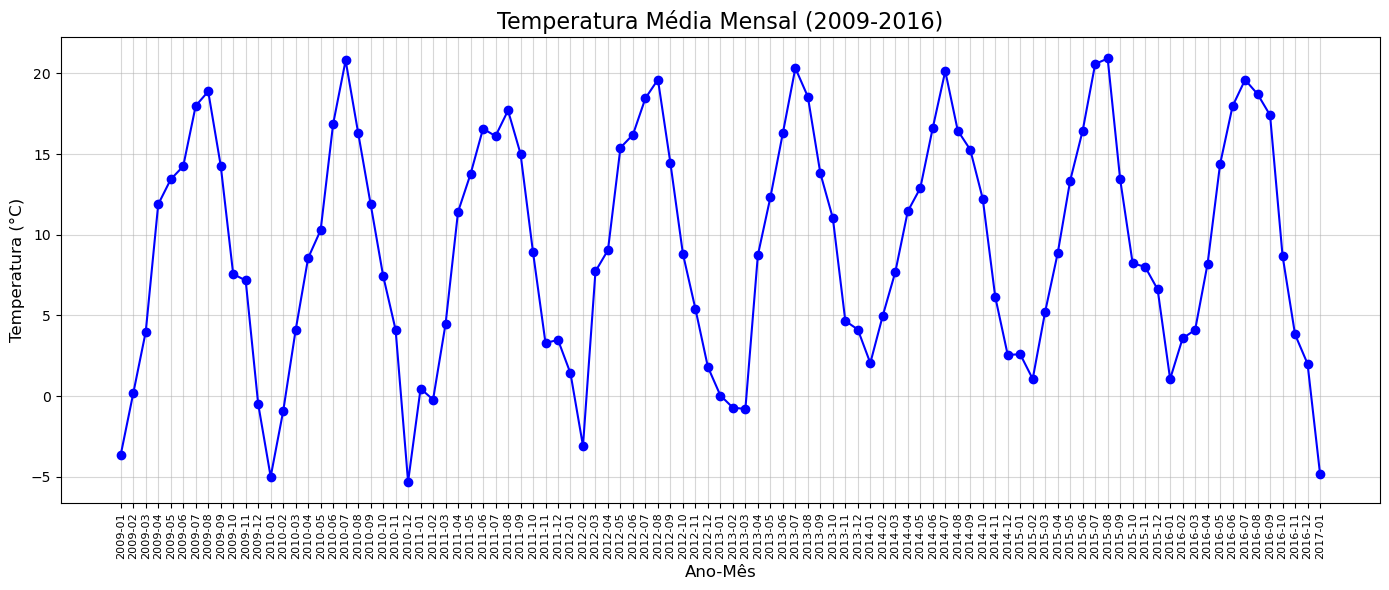

In [24]:
# Plotando o gráfico de linhas - Médias Mensais
plt.figure(figsize=(14, 6))

plt.plot(temp_media_mensal['Ano_Mes'], 
         temp_media_mensal['T (degC)'], 
         marker='o', 
         color='blue')

# Ajustando o eixo "x"
plt.xticks(ticks=range(len(temp_media_mensal)), 
           labels=temp_media_mensal['Ano_Mes'], 
           rotation=90, 
           fontsize=8)

# Configurando os títulos
plt.title('Temperatura Média Mensal (2009-2016)', 
          fontsize=16)
plt.xlabel('Ano-Mês', 
           fontsize=12)
plt.ylabel('Temperatura (°C)', 
           fontsize=12)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

No gráfico de linha acima, observa-se uma sazonalidade, ou seja, padrões que se repetem de tempos em tempos, com picos que indicam variações regulares ao longo de cada ano. Isso pode estar relacionado com as estações do ano, já que a média das maiores temperaturas registradas (de cada ano) ocorreram entre os meses de julho e agosto (verão) e, das menores, entre dezembro e fevereiro (inverno). Essa marcação definida é uma característica esperada de regiões com o clima bem definido (Zona Temperada). Além disso, também é notado uma tendência de aumento das médias das temperaturas mínimas de cada ano: entre 2009 e 2013 foram apontadas temperaturas negativas, enquanto que, a partir de 2014, elas permaneceram acima de $0 \text{°C}$. Entretando, para analisar com mais propriedade a tendência, seria necessária a obtenção de mais dados a fim de adquirir uma consistência maior.

Com base no conjunto de dados, com intenção de captar irformações mais específicas, é válido construir um gráfico de linhas baseado no último ano com a média da temperatura por semana. Ademais, definir as estações do ano auxilia na identificação de padrões. As estações ocorrem nos seguintes períodos:

* **Inverno:** de 21 de dezembro a 19 de março;
* **Primavera:** de 20 de março a 19 de junho;
* **Verão:** de 20 de junho a 21 de setembro;
* **Outono:** de 22 de setembro a 20 de dezembro.


In [25]:
# Filtrando dados do ano de 2016
ano_2016 = dados_filtrado[dados_filtrado['Date Time'].dt.year == 2016]

# Adicionando a coluna com a semana do ano
ano_2016['Semana'] = ano_2016['Date Time'].dt.isocalendar().week

# Adicionando a coluna com as horas do dia
ano_2016['Hora'] = ano_2016['Date Time'].dt.hour

# Calculando a média da temperatura por semana
temp_semanal_2016 = ano_2016.groupby('Semana')[
    'T (degC)'].mean().reset_index()

In [26]:
# Definindo a semana do início de cada estação
# (com cores distintas)
estacoes = {'Primavera': (12, 'orange'),  
            'Verão':     (25, 'red'),    
            'Outono':    (39, 'black'),  
            'Inverno':   (51, 'blue')}

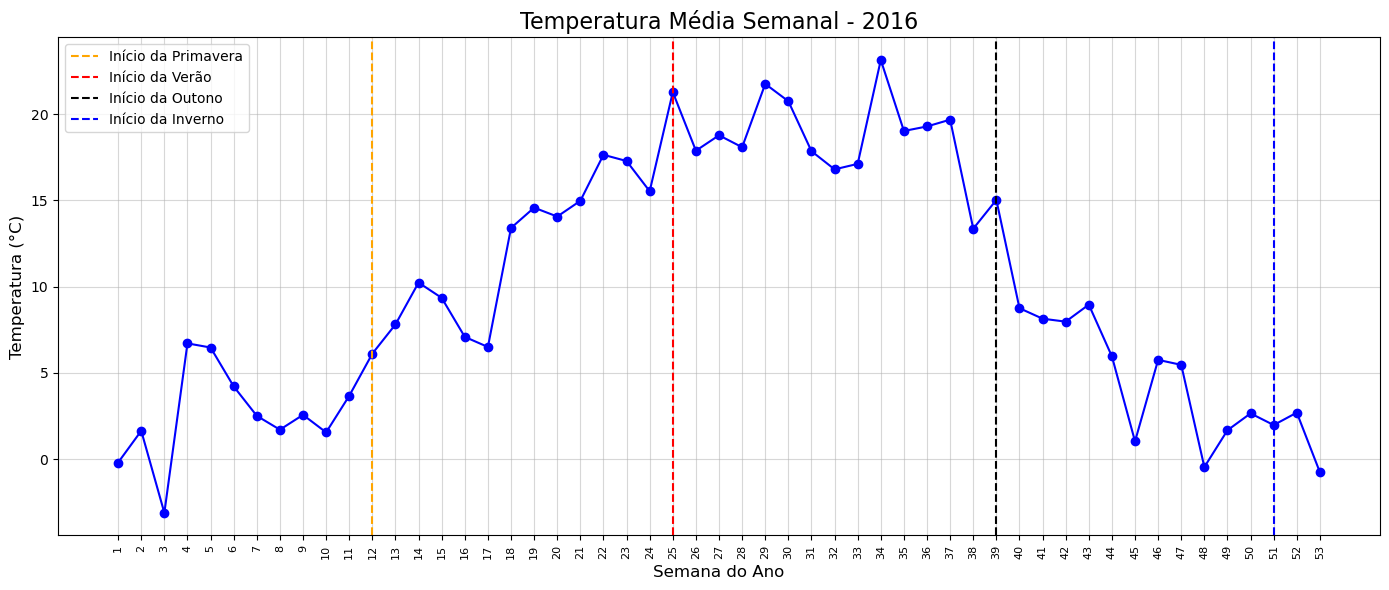

In [27]:
# Plotando o gráfico de linhas com linhas verticais para cada estação
plt.figure(figsize=(14, 6))

plt.plot(temp_semanal_2016['Semana'], 
         temp_semanal_2016['T (degC)'], 
         marker='o', 
         color='blue')

for estacao, (semana, cor) in estacoes.items():
    plt.axvline(semana, 
                linestyle='--', 
                label=f'Início da {estacao}', 
                color=cor)

plt.xticks(ticks=temp_semanal_2016['Semana'], 
           labels=temp_semanal_2016['Semana'], 
           rotation=90, 
           fontsize=8)
plt.title('Temperatura Média Semanal - 2016', 
          fontsize=16)
plt.xlabel('Semana do Ano', 
           fontsize=12)
plt.ylabel('Temperatura (°C)', 
           fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


Com base no gráfico acima, referente ao ano de 2016, constata-se que no inverno tem-se as temperaturas mais baixas, que começam a subir durante a primavera, atingindo o máximo no verão. No outono, as temperaturas diminuem, sendo mais baixas do que na primavera.

Ademais, é válido entender como as temperaturas variam ao longo dos dias, se possuem um mesmo padrão de oscilação. Para esse objetivo, será selecionada a primeira semana completa de cada mês, no qual cada semana terá a temperatura média calculada por hora.

In [28]:
# Selecionando as semanas
semanas_selec = ano_2016.groupby(
    'Mes')['Semana'].min().reset_index()

# Filtrando os dados para as semanas selecionadas
dados_filt_2016 = pd.merge(ano_2016, 
                           semanas_selec, 
                           on=['Mes', 'Semana'])

# Calculando a média da temperatura por hora de cada mês/semana
media_hora_mes = dados_filt_2016.groupby(
    ['Mes', 'Hora'])['T (degC)'].mean().reset_index()

# Craindo uma lista com os nomes dos meses
nomes_meses = ['Janeiro', 'Fevereiro', 
               'Março', 'Abril', 'Maio', 
               'Junho', 'Julho', 'Agosto', 
               'Setembro', 'Outubro', 
               'Novembro', 'Dezembro']

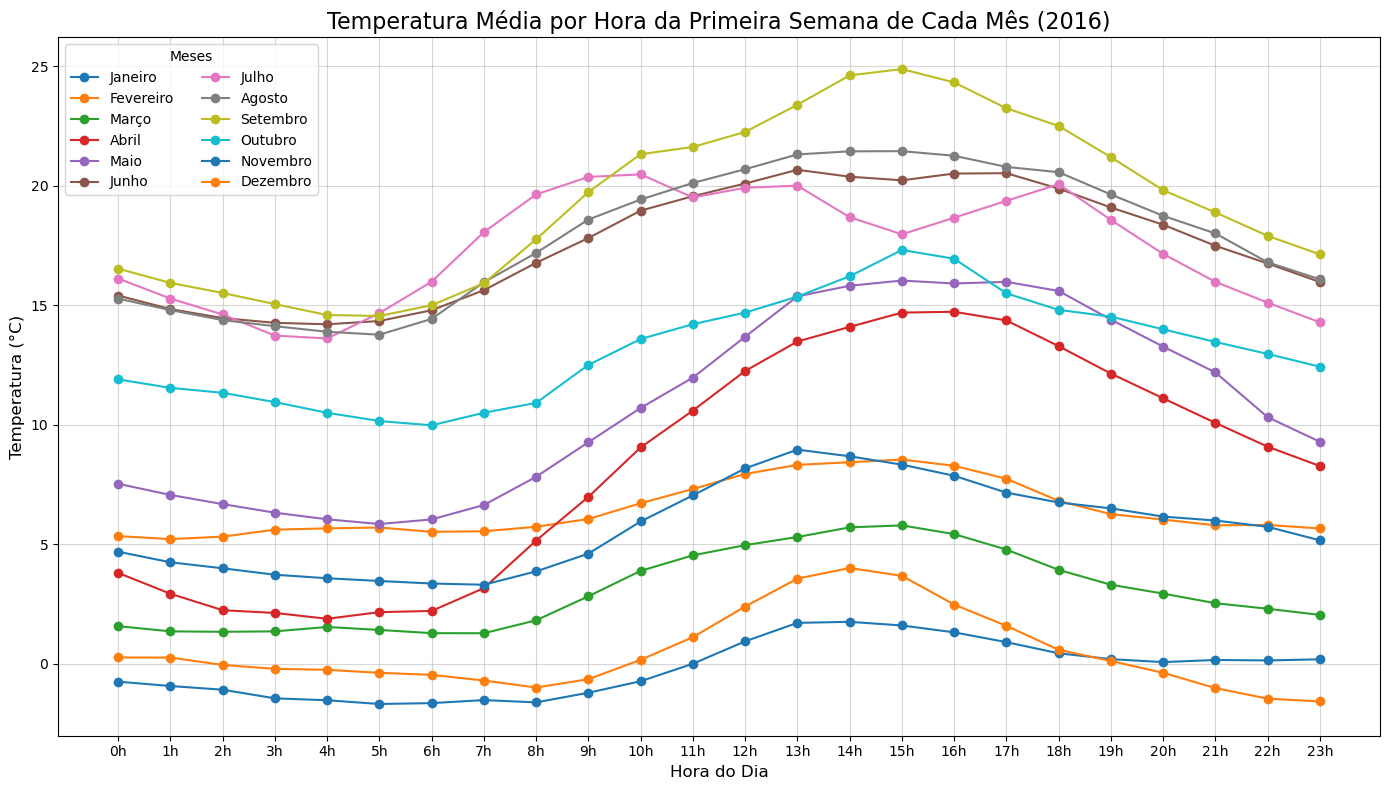

In [29]:
# Plotando o gráfico - Médias Semanais de cada Mês
plt.figure(figsize=(14, 8))

for mes in range(1, 13):
    dados_mes = media_hora_mes[media_hora_mes['Mes'] == mes]
    plt.plot(dados_mes['Hora'], 
             dados_mes['T (degC)'], 
             marker='o', 
             label=nomes_meses[mes - 1])

plt.title('Temperatura Média por Hora da Primeira Semana de Cada Mês (2016)', 
          fontsize=16)
plt.xlabel('Hora do Dia', 
           fontsize=12)
plt.ylabel('Temperatura (°C)', 
           fontsize=12)
plt.xticks(range(24), 
           labels=[f'{h}h' for h in range(24)], 
           fontsize=10)
plt.legend(title='Meses', 
           fontsize=10, 
           loc='upper left', 
           ncol=2)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

Calculando a temperatura média por hora de cada semana selecionada de cada mês do ano de 2016, verifica-se que as temperaturas tiveram um leve decaimento entre $0h$ e $5h$, passando a aumentar gradativamente até atingir seu máximo entre $13h$ e $15h$, com exceção do mês de julho, que, nesse mesmo período, ocorreu uma queda. Após as $15h$, as temperaturas voltaram a diminuir gradativamente, com exceção, novamente, do mês de julho (antes de cair, teve seu ponto máximo do período da tarde às $18h$). Também percebe-se que nos meses de abril, maio e setembro houve uma maior variação de temperatura ao longo do dia, com destaque para abril. Porém, ao olhar os dados de maneira geral, parece que em todos os meses há um comportamento similar, com a mesma curva, exceto julho.

# 8. Proposta de um Modelo Baseline

Com os estudos e análises realizados até o momento, será proposto um modelo simples e fácil de implementar, que servirá para estabelecer uma base de desempenho. Além disso, esse tipo de modelo não exige grande esforço computacional ou análises muito complexas. Entretanto, permite avaliar o impacto das melhorias ou da complexidade adicional. Se um modelo mais sofisticado não superar significativamente esse modelo baseline, pode ser um sinal de que o modelo complexo não está sendo bem aplicado ou que não há informações adicionais para melhorar a previsão e, então, o modelo baseline pode ser aplicado como solução final.

Como os dados fornecidos estão relacionados com o passar do tempo, será proposto um **Modelo de Média Móvel**, cuja ideia é calcular a média com base em um conjunto de valores dentro de um intervalo temporal, que move-se ao longo do tempo. O modelo mais elementar para isso é o **Modelo de Média Móvel Simples**, que calcula a média de um número fixo de períodos consecutivos. Portanto, algumas outras manipulações nos dados serão necessárias, pois apenas serão exigidas duas informações: a data e a temperatura.

## 8.1 Preparação dos dados

In [30]:
# Obtendo um dataframe com as colunas referentes à temperatura e à data
dados_model_base = dados_filtrado[
    ['T (degC)', 'Ano', 'Mes', 'Dia', 'Hora']]

In [31]:
# Definindo a tabela 1 com a média da temperatura 
# de cada hora de cada dia (para todos os anos)
tab_media_hora_1 = dados_model_base.groupby(
    ['Ano', 'Mes', 'Dia', 'Hora']).mean().reset_index()

Neste momento, pode-se aplicar uma função que desloca uma variável, no caso a temperatura, por um período definido: $24h$. Esse deslocamento trará uma informação crucial: a variável com a temperatura após $24h$, tornando a **variável resposta**.

In [32]:
# Criando a coluna que indica a temperatura para as próximas 24h
tab_media_hora_1['T (24h)'] = tab_media_hora_1['T (degC)'].shift(-24)

# Visualizando
tab_media_hora_1.head()

,Ano,Mes,Dia,Hora,T (degC),T (24h)
0,2009,1,1,0,-8.304000,-4.575000
1,2009,1,1,1,-8.065000,-4.366667
2,2009,1,1,2,-8.763333,-4.305000
3,2009,1,1,3,-8.896667,-4.433333
4,2009,1,1,4,-9.348333,-4.735000


In [33]:
# Renomeando algumas colunas para melhor entendimento
tab_media_hora_1 = tab_media_hora_1.rename(columns={'T (degC)' : 'Media_Temp',
                                                    'T (24h)' : 'Media_Temp_24h'})

# Visualizando a mudança
tab_media_hora_1.head()

,Ano,Mes,Dia,Hora,Media_Temp,Media_Temp_24h
0,2009,1,1,0,-8.304000,-4.575000
1,2009,1,1,1,-8.065000,-4.366667
2,2009,1,1,2,-8.763333,-4.305000
3,2009,1,1,3,-8.896667,-4.433333
4,2009,1,1,4,-9.348333,-4.735000


Contudo, esse esse método direto pode trazer um problema quando uma ou mais observações estiverem faltando, pois esse deslocamento das horas ocorrerá de forma errônea, comprometendo as previsões.

Com a finalidade de evitar essa situação, será exibido um procedimento alternativo, no qual uma outra tabela idêntica será criada para estabelecer uma conexão correta entre os dias e as horas.

In [34]:
# Criando a tabela 2 com a média da temperatura 
# de cada hora de cada dia (para todos os anos)
tab_media_hora_2 = dados_model_base.groupby(
    ['Ano', 'Mes', 'Dia', 'Hora']).mean().reset_index()

In [35]:
# Adicionando a coluna que une a data com a hora
tab_media_hora_2['Data_Hora'] = pd.to_datetime(tab_media_hora_1[
    ['Ano', 'Mes', 'Dia', 'Hora']].astype(str).agg('-'.join, axis=1) + ':00:00')

In [36]:
# Adicionando a coluna que indica a data e a hora para as próximas 24h
tab_media_hora_2['Data_Hora_Mais_24h'] = tab_media_hora_2[
    'Data_Hora'] + pd.Timedelta(hours=24)

# Visualizando
tab_media_hora_2

,Ano,Mes,Dia,Hora,T (degC),Data_Hora,Data_Hora_Mais_24h
0,2009,1,1,0,-8.304000,2009-01-01 00:00:00,2009-01-02 00:00:00
1,2009,1,1,1,-8.065000,2009-01-01 01:00:00,2009-01-02 01:00:00
2,2009,1,1,2,-8.763333,2009-01-01 02:00:00,2009-01-02 02:00:00
3,2009,1,1,3,-8.896667,2009-01-01 03:00:00,2009-01-02 03:00:00
4,2009,1,1,4,-9.348333,2009-01-01 04:00:00,2009-01-02 04:00:00
...,...,...,...,...,...,...,...
70036,2016,12,31,20,-2.503333,2016-12-31 20:00:00,2017-01-01 20:00:00
70037,2016,12,31,21,-2.653333,2016-12-31 21:00:00,2017-01-01 21:00:00
70038,2016,12,31,22,-3.553333,2016-12-31 22:00:00,2017-01-01 22:00:00
70039,2016,12,31,23,-3.746667,2016-12-31 23:00:00,2017-01-01 23:00:00


In [37]:
# Fazendo o .copy como garantia para não sobrescrever
tab_media_hora = tab_media_hora_2.copy()

In [38]:
# Tabela com o resultado da junção entre as duas tabelas iguais,
# evidenciando a média da temperatura nas próximas 24h
tab_media_hora_final = tab_media_hora_2[['T (degC)',
                                         'Data_Hora',
                                         'Data_Hora_Mais_24h']].merge(
    tab_media_hora[['Data_Hora','T (degC)']],
                    how='left', 
                    left_on='Data_Hora_Mais_24h',
                    right_on='Data_Hora')

# Visualizando a junção das tabelas
tab_media_hora_final.head()

,T (degC)_x,Data_Hora_x,Data_Hora_Mais_24h,Data_Hora_y,T (degC)_y
0,-8.304000,2009-01-01 00:00:00,2009-01-02 00:00:00,2009-01-02 00:00:00,-4.575000
1,-8.065000,2009-01-01 01:00:00,2009-01-02 01:00:00,2009-01-02 01:00:00,-4.366667
2,-8.763333,2009-01-01 02:00:00,2009-01-02 02:00:00,2009-01-02 02:00:00,-4.305000
3,-8.896667,2009-01-01 03:00:00,2009-01-02 03:00:00,2009-01-02 03:00:00,-4.433333
4,-9.348333,2009-01-01 04:00:00,2009-01-02 04:00:00,2009-01-02 04:00:00,-4.735000


Ao realizar a junção de duas tabelas pelas datas, com a função "merge" e argumento "how='left'", pode ocorrer de algumas datas não coincidirem ao somar $24h$, gerando uma tabela com dados faltantes. Esse ponto foi detectado durante a análise descritiva e será mostrado a seguir, a quantidade desses dados faltantes.

In [39]:
# Verificando a presença de dados faltantes
tab_media_hora_final.isnull().sum()

T (degC)_x             0
Data_Hora_x            0
Data_Hora_Mais_24h     0
Data_Hora_y           63
T (degC)_y            63
dtype: int64

In [40]:
# Apresentando as linhas sem informação
tab_media_hora_final[tab_media_hora_final.isnull().any(axis=1)]

,T (degC)_x,Data_Hora_x,Data_Hora_Mais_24h,Data_Hora_y,T (degC)_y
50202,12.371667,2014-09-23 18:00:00,2014-09-24 18:00:00,NaT,NaN
50203,11.140000,2014-09-23 19:00:00,2014-09-24 19:00:00,NaT,NaN
50204,10.086667,2014-09-23 20:00:00,2014-09-24 20:00:00,NaT,NaN
50205,9.521667,2014-09-23 21:00:00,2014-09-24 21:00:00,NaT,NaN
50206,8.743333,2014-09-23 22:00:00,2014-09-24 22:00:00,NaT,NaN
...,...,...,...,...,...
70036,-2.503333,2016-12-31 20:00:00,2017-01-01 20:00:00,NaT,NaN
70037,-2.653333,2016-12-31 21:00:00,2017-01-01 21:00:00,NaT,NaN
70038,-3.553333,2016-12-31 22:00:00,2017-01-01 22:00:00,NaT,NaN
70039,-3.746667,2016-12-31 23:00:00,2017-01-01 23:00:00,NaT,NaN


Tem-se $63$ linhas em que não há informação. Logo, elas serão removidas mais a frente, a fim de não impactarem (dar erro) no momento de calcular a métrica MAE.

Na tabela acima, a coluna "T (degC)_x" refere-se à média da temperatura em relação à coluna "Data_Hora_x" (data e hora de cada observação). A "Data_Hora_mais_24h" corresponde à soma de $24h$ na coluna "Data_Hora_x". Já a  "Data_Hora_y", é idêntica à variável "Data_Hora_mais_24h", que se relaciona com "T (degC)_y", equivalente à média da temperatura nas próximas $24h$.

Feito isso, para facilitar o entendimento e evitar a redundância, será removida a coluna "Data_Hora_y", além das demais serem renomeadas.

In [41]:
# Removendo a coluna "Data_Hora_y"
tab_media_hora_final = tab_media_hora_final.drop(columns=['Data_Hora_y'])

# Renomeando as demais colunas
tab_media_hora_final = tab_media_hora_final.rename(columns={'T (degC)_x' : 'Media_Temp',
                                                            'Data_Hora_x' : 'Data_Hora',
                                                            'T (degC)_y' : 'Media_Temp_24h'})

# Visualizando as mudanças
tab_media_hora_final.head()

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h
0,-8.304000,2009-01-01 00:00:00,2009-01-02 00:00:00,-4.575000
1,-8.065000,2009-01-01 01:00:00,2009-01-02 01:00:00,-4.366667
2,-8.763333,2009-01-01 02:00:00,2009-01-02 02:00:00,-4.305000
3,-8.896667,2009-01-01 03:00:00,2009-01-02 03:00:00,-4.433333
4,-9.348333,2009-01-01 04:00:00,2009-01-02 04:00:00,-4.735000


Com os tratamentos realizados até então, segue-se para a etapa da implementação do Modelo de Médias Móveis.

## 8.2 Modelo de Médias Móveis

Para a implementação desse modelo, será calculada a média das últimas $3$ horas em relação à data (variável "Data_Hora"). Essa quantidade foi escolhida arbitrariamente, podendo ser considerado outro valor.

In [44]:
# Garantindo a ordem cronológica dos dados
dados_model_base_final = tab_media_hora_final.sort_values(by='Data_Hora')

In [45]:
# Aplicando a média móvel com janela de 3 horas
dados_model_base_final['Media_3h'] = dados_model_base_final[
    'Media_Temp'].rolling(window=3, min_periods=1).mean()                                                                               

Nesse ponto, para calcular a média móvel, foi aplicada a função "rolling", com janela igual a $3$ horas, e período mínimo de $1$ hora, com a finalidade de ser possível obter a temperatura média das duas primeiras observações.

In [46]:
# Analisando a tabela obtida
dados_model_base_final

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h
0,-8.304000,2009-01-01 00:00:00,2009-01-02 00:00:00,-4.575000,-8.304000
1,-8.065000,2009-01-01 01:00:00,2009-01-02 01:00:00,-4.366667,-8.184500
2,-8.763333,2009-01-01 02:00:00,2009-01-02 02:00:00,-4.305000,-8.377444
3,-8.896667,2009-01-01 03:00:00,2009-01-02 03:00:00,-4.433333,-8.575000
4,-9.348333,2009-01-01 04:00:00,2009-01-02 04:00:00,-4.735000,-9.002778
...,...,...,...,...,...
70036,-2.503333,2016-12-31 20:00:00,2017-01-01 20:00:00,NaN,-1.600556
70037,-2.653333,2016-12-31 21:00:00,2017-01-01 21:00:00,NaN,-2.171111
70038,-3.553333,2016-12-31 22:00:00,2017-01-01 22:00:00,NaN,-2.903333
70039,-3.746667,2016-12-31 23:00:00,2017-01-01 23:00:00,NaN,-3.317778


Feito isso, temos os **resultados** da previsão da temperatura para as próximas $24h$ de acordo com média das últimas 3 horas em relação à data.

### 8.2.1 Gráfico de linhas do Modelo de Médias Móveis

Portanto, com o resultado esperado calculado, será plotado um gráfico de linhas que mostrará a temperatura real em comparação com a temperatura predita, com ambas em graus Celsius. O intervalo de tempo considerado será de 15/12/2016 a 01/01/2017, a fim de facilitar a visualização.

In [47]:
# Definindo um conjunto dados para ser mostrado
dados_preditos = dados_model_base_final[dados_model_base_final[
    'Data_Hora'] >= '2016-12-15']

# Visualizando
dados_preditos.head(2)

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h
69632,4.466667,2016-12-15 00:00:00,2016-12-16 00:00:00,0.395000,4.523889
69633,4.486667,2016-12-15 01:00:00,2016-12-16 01:00:00,0.328333,4.515000


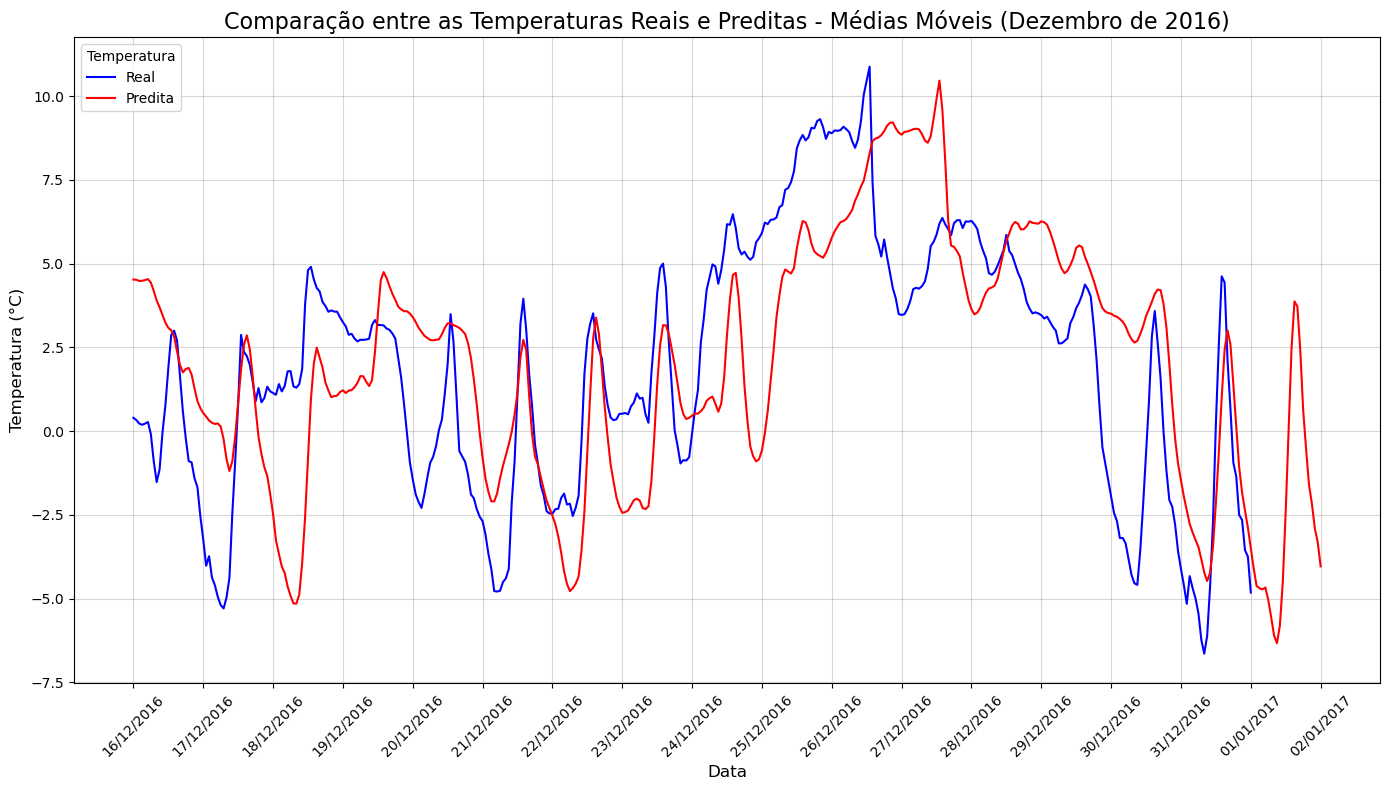

In [48]:
# Definindo uma lista de datas para serem mostradas no eixo "x"
datas_especificas_dez = pd.date_range(start="2016-12-16", 
                                      end="2017-01-02", 
                                      freq='D')

# Plotando o gráfico de linhas para dezembro de 2016
plt.figure(figsize=(14, 8))

plt.plot(dados_preditos['Data_Hora_Mais_24h'], 
         dados_preditos['Media_Temp_24h'], 
         color = "blue", 
         label = "Real") 

plt.plot(dados_preditos['Data_Hora_Mais_24h'], 
         dados_preditos['Media_3h'], 
         color = "red", 
         label = "Predita")
 
plt.xticks(ticks=datas_especificas_dez, 
           labels=[data.strftime('%d/%m/%Y') 
               for data in datas_especificas_dez], 
               rotation=45, 
               fontsize=10)

plt.title('Comparação entre as Temperaturas Reais e Preditas - Médias Móveis (Dezembro de 2016)', 
          fontsize=16)
plt.xlabel('Data', 
           fontsize=12)
plt.ylabel('Temperatura (°C)', 
           fontsize=12)
plt.legend(title='Temperatura', 
           fontsize=10, 
           loc='upper left')
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

Com base no gráfico de linhas acima, foram definidas datas a partir do dia 15 de dezembro de 2016. A linha em **azul** representa as **temperaturas reais**, ou seja, as temperaturas fornecidas no conjunto de dados. Já a linha **vermelha**, retrata as **temperaturas preditas** pelo Modelo de Médias Móveis. É observado que os valores preditos estão deslocados em um dia com base nos valores reais, dado que para predizer é preciso que se passem $24h$ a fim de ser realizada a média das $3$ horas. 

Com o objetivo de observar as temperaturas a cada três horas, especialmente para a data que não contém dados reais (01/01/2017), será plotado um gráfico de linhas com base nos últimos dois dias do ano de 2016.

In [49]:
# Definindo um conjunto dados para ser mostrado
dados_preditos_semana = dados_model_base_final[dados_model_base_final[
    'Data_Hora_Mais_24h'] >= "2016-12-30"]

# Visualizando
dados_preditos_semana.head(2)

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h
69968,3.46,2016-12-29 00:00:00,2016-12-30 00:00:00,-1.965000,3.504444
69969,3.36,2016-12-29 01:00:00,2016-12-30 01:00:00,-2.446667,3.443333


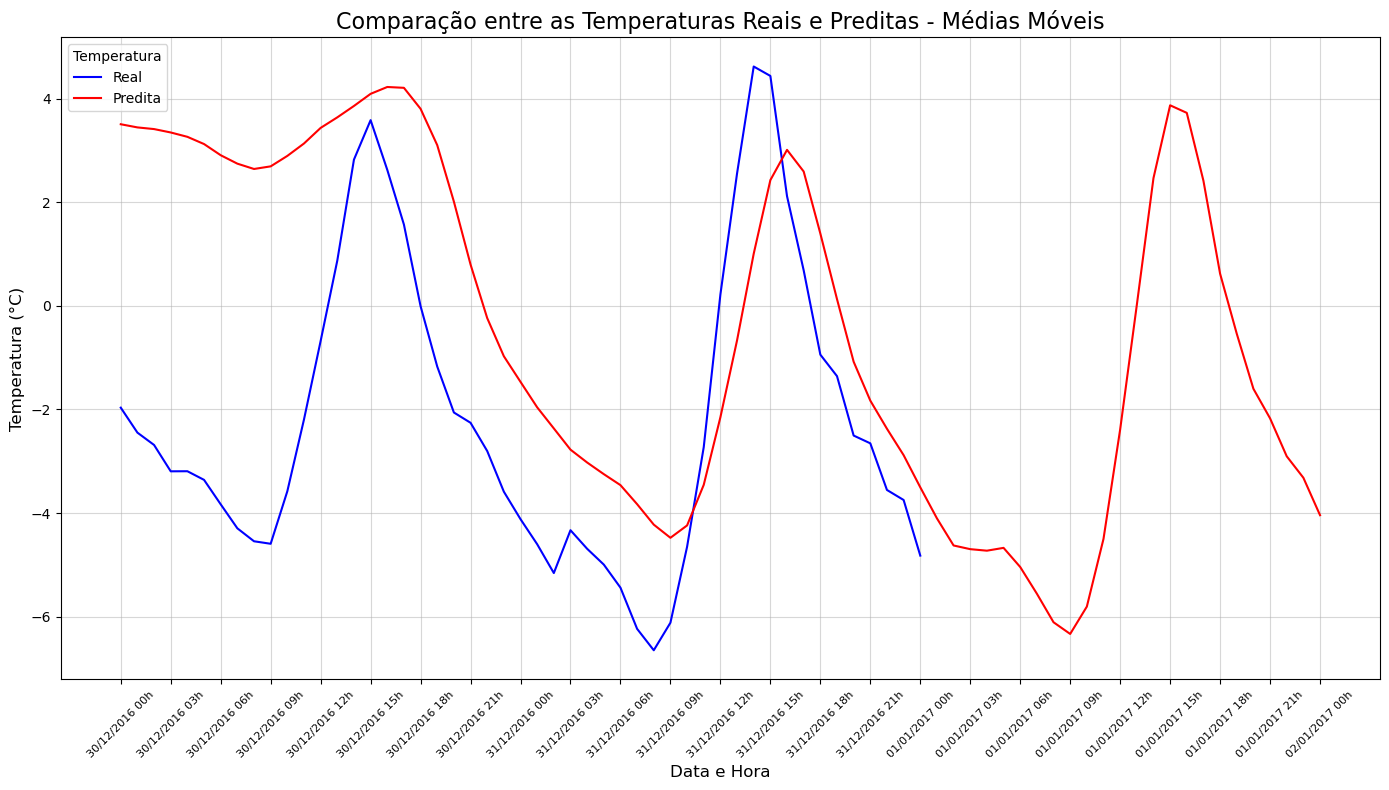

In [53]:
# Criando uma lista com datas específicas 
data_inicial = dados_preditos_semana['Data_Hora_Mais_24h'].min()  
data_final = dados_preditos_semana['Data_Hora_Mais_24h'].max() 
datas_especificas = pd.date_range(start=data_inicial, 
                                  end=data_final, 
                                  freq='3h')  

plt.figure(figsize=(14, 8))

plt.plot(dados_preditos_semana['Data_Hora_Mais_24h'], 
         dados_preditos_semana['Media_Temp_24h'], 
         color='blue', 
         label='Real')

plt.plot(dados_preditos_semana['Data_Hora_Mais_24h'], 
         dados_preditos_semana['Media_3h'], 
         color='red', 
         label='Predita')

plt.xticks(ticks=datas_especificas, 
           labels=[data.strftime('%d/%m/%Y %Hh') 
                   for data in datas_especificas],
           rotation=45,
           fontsize=8)

plt.title('Comparação entre as Temperaturas Reais e Preditas - Médias Móveis', 
          fontsize=16)
plt.xlabel('Data e Hora', 
           fontsize=12)
plt.ylabel('Temperatura (°C)', 
           fontsize=12)
plt.grid(alpha=0.5)
plt.legend(title='Temperatura', 
           fontsize=10, 
           loc='upper left')

plt.tight_layout()
plt.show()


Nesse gráfico, a linha azul, que representa a temperatura real, é a referência para avaliar a qualidade do modelo preditivo. A linha vermelha, que representa a temperatura predita, serve como base para verificar a capacidade do modelo em replicar os padrões reais. Nesse caso, pode-se observar um comportamento das séries temporais, pois as duas curvas mostram padrões semelhantes, sugerindo que o modelo de previsão está capturando, em grande parte, o comportamento geral da temperatura ao longo do tempo. Apesar dessa semelhança, nota-se discrepâncias em alguns pontos, como os picos e vales das curvas que não estão perfeitamente alinhados, indicando que o modelo não prevê exatamente os extremos da temperatura. Para confirmar a qualidade do modelo, é intrínseco o cálculo de métricas quantitativas. Nesse estudo, será aplicada a métrica MAE.

### 8.2.2 Tratamentos para aplicar a métrica MAE - Médias Móveis

Com base nas últimas linhas da tabela com as predições realizadas ("dados_model_base_final"), a coluna "Media_Temp_24h" não está totalmente preenchida, uma vez que as últimas linhas correspondem ao dia 01/01/2017 (dados não pertencentes ao dataset original). Portanto, para seguir com os próximos passos, essas observações serão removidas, visto que uma métrica quantitativa não consegue comparar um valor faltante, ou uma $string$, com um valor numérico.

In [54]:
# Removendo as linhas sem dados
tab_sem_dados_faltantes = dados_model_base_final.dropna()

In [55]:
# Visualizando as primeiras observações
tab_sem_dados_faltantes.head()

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h
0,-8.304000,2009-01-01 00:00:00,2009-01-02 00:00:00,-4.575000,-8.304000
1,-8.065000,2009-01-01 01:00:00,2009-01-02 01:00:00,-4.366667,-8.184500
2,-8.763333,2009-01-01 02:00:00,2009-01-02 02:00:00,-4.305000,-8.377444
3,-8.896667,2009-01-01 03:00:00,2009-01-02 03:00:00,-4.433333,-8.575000
4,-9.348333,2009-01-01 04:00:00,2009-01-02 04:00:00,-4.735000,-9.002778


In [56]:
# Visualizando as últimas observações
tab_sem_dados_faltantes.tail()

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h
70012,-2.058333,2016-12-30 20:00:00,2016-12-31 20:00:00,-2.503333,-1.078889
70013,-2.256667,2016-12-30 21:00:00,2016-12-31 21:00:00,-2.653333,-1.828889
70014,-2.801667,2016-12-30 22:00:00,2016-12-31 22:00:00,-3.553333,-2.372222
70015,-3.586667,2016-12-30 23:00:00,2016-12-31 23:00:00,-3.746667,-2.881667
70016,-4.116667,2016-12-31 00:00:00,2017-01-01 00:00:00,-4.820000,-3.501667


Nesse momento, tem-se os dados limpos e tratados para serem utilizados no cálculo da métrica a seguir.

### 8.2.3 Aplicação da métrica MAE - Médias Móveis

O MAE (Mean Absolute Error), ou **Erro Absoluto Médio**, é uma métrica aplicada para avaliar a performance de modelos de previsão. É caracterizada por calcular a média das diferenças absolutas entre os valores reais (observados) e os valores previstos pelo modelo. Simplificando, o MAE diz o quanto as previsões estão erradas em relação aos valores reais no conjunto de dados, sendo considerada uma métrica robusta e de fácil interpretação. Logo, a fórmula para o cálculo é dada por:

$MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_{\text{real},i} - y_{\text{previsto},i} \right|$,

em que:

* $n: $ é o número total de observações;
* $y_{\text{real},i}: $ é o valor real observado na i-ésima instância;
* $y_{\text{previsto},i}: $ é o valor previsto pelo modelo na i-ésima instância.

O resultado será o módulo (valor absoluto) da diferença entre o real e o predito. Além disso, a resposta será na mesma unidade da variável resposta, no caso, $\text{°C}$. Por conseguinte, definem-se os dados da base de teste, nos quais será aplicada a métrica.

In [65]:
# Definindo os dados de teste
dados_teste = tab_sem_dados_faltantes[tab_sem_dados_faltantes[
    'Data_Hora'] >= '2016-01-01']

# Visualizando
dados_teste.tail(3)

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h,Residuos
70014,-2.801667,2016-12-30 22:00:00,2016-12-31 22:00:00,-3.553333,-2.372222,-1.181111
70015,-3.586667,2016-12-30 23:00:00,2016-12-31 23:00:00,-3.746667,-2.881667,-0.865000
70016,-4.116667,2016-12-31 00:00:00,2017-01-01 00:00:00,-4.820000,-3.501667,-1.318333


Nesse momento, a base para teste serve para, posteriormente, ser possível a comparação entre a métrica do Modelo de Médias Móveis (baseline) e a métrica de um modelo mais complexo. Dessa forma, é essencial estabelecer o mesmo período para confrontar as métricas e não gerar resultados enviesados ou equívocos.

Após essa definição, separam-se as variáveis que possuem os valores reais e as que possuem os valores preditos.

In [58]:
# Valores reais (fornecidos)
y_real = dados_teste['Media_Temp_24h']

# Valores preditos
y_pred = dados_teste['Media_3h']

Feito isso, calcula-se a métrica MAE.

In [63]:
# Calculando o MAE
mae_med_moveis = mean_absolute_error(y_real, y_pred)

# Mostrando o resultado obtido
print(f"MAE (Mean Absolute Error) - Médias Móveis: {
    mae_med_moveis:.2f}")

MAE (Mean Absolute Error) - Médias Móveis: 2.55


Logo, o **Erro Absoluto Médio** do Modelo de Médias Móveis sugerido é $2.55 \text{°C}$, podendo ser para mais ou para menos em relação à temperatura prevista.

Além disso, uma etapa fundamental, para entender melhor o desempenho do modelo e identificar possíveis padrões ou problemas, é a análise dos resíduos.

### 8.2.4 Análise dos resíduos - Médias Móveis

Os resíduos são definidos como a diferença entre os valores reais e os valores preditos pelo modelo preditivo:

$\text{Resíduo = Valor Real - Valor Predito}$.

In [ ]:
# Calculando os resíduos
tab_sem_dados_faltantes['Residuos'] = tab_sem_dados_faltantes[
    'Media_Temp_24h'] - tab_sem_dados_faltantes['Media_3h']

Desse modo, tem-se por finalidade verificar se os resíduos apresentam tendências ou sazonalidadesao ao longo do tempo.

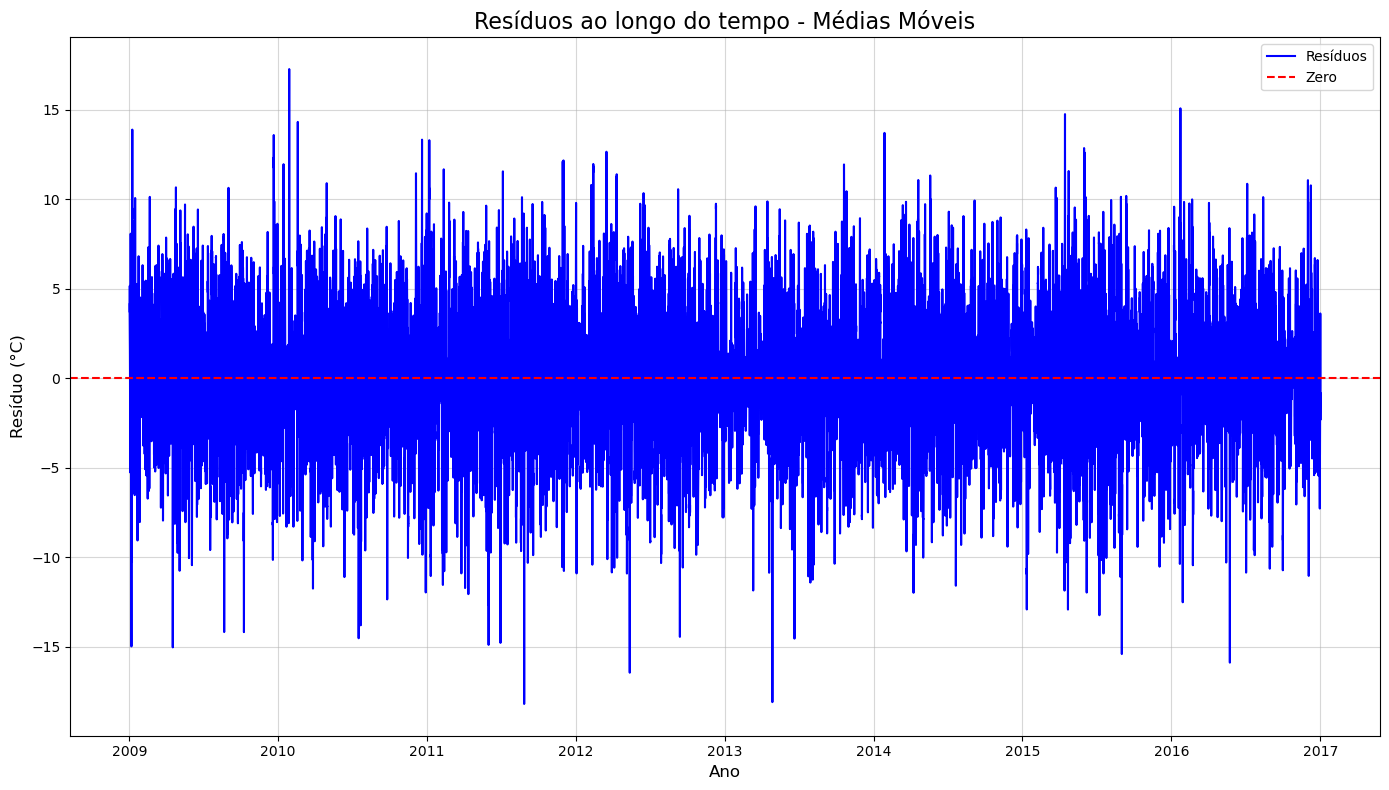

In [67]:
# Plotando o gráfico de linha dos resíduos (2009 - 2016)
plt.figure(figsize=(14, 8))

sns.lineplot(x='Data_Hora_Mais_24h', 
             y='Residuos', 
             data=tab_sem_dados_faltantes, 
             color='blue', 
             label='Resíduos')

plt.axhline(y=0, 
            color='red', 
            linestyle='--', 
            label='Zero')

plt.title('Resíduos ao longo do tempo - Médias Móveis', 
          fontsize=16)
plt.xlabel('Ano', 
           fontsize=12)
plt.ylabel('Resíduo (°C)', 
           fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

De acordo com o gráfico de linhas acima, os resíduos variam em torno do zero, o que significa que o modelo não possui um viés significativo, ou seja, ele não tende a superestimar ou subestimar as temperaturas. Entretanto, parece haver flutuações maiores em determinados períodos, indicando que o modelo pode estar enfrentando dificuldades para capturar variações específicas da série temporal.

Por exemplo, há picos nos resíduos que ultrapassam os $10\text{°C}$, tanto positivo quanto negativo, indicando erros do modelo para condições específicas, como grande variação da temperatura, ruído nos dados ou falta de informação para capturar esses eventos.

O gráfico também não exibe um padrão claro de sazonalidade ou tendência nos resíduos, mostrando que o modelo está interpretando os padrões sazonais ou tendências presentes nos dados. Porém, há resíduos muito grandes, que ultrapassam os $15\text{°C}$, podendo serem classificados como $outliers$.

Também é utilizada como análise de resíduo a sua **distribuição**, a fim de verificar se é ou não normal, tendo em vista que alguns modelos estatísticos exigem certas condições, como a normalidade dos resíduos. Para isso, plota-se o histograma.

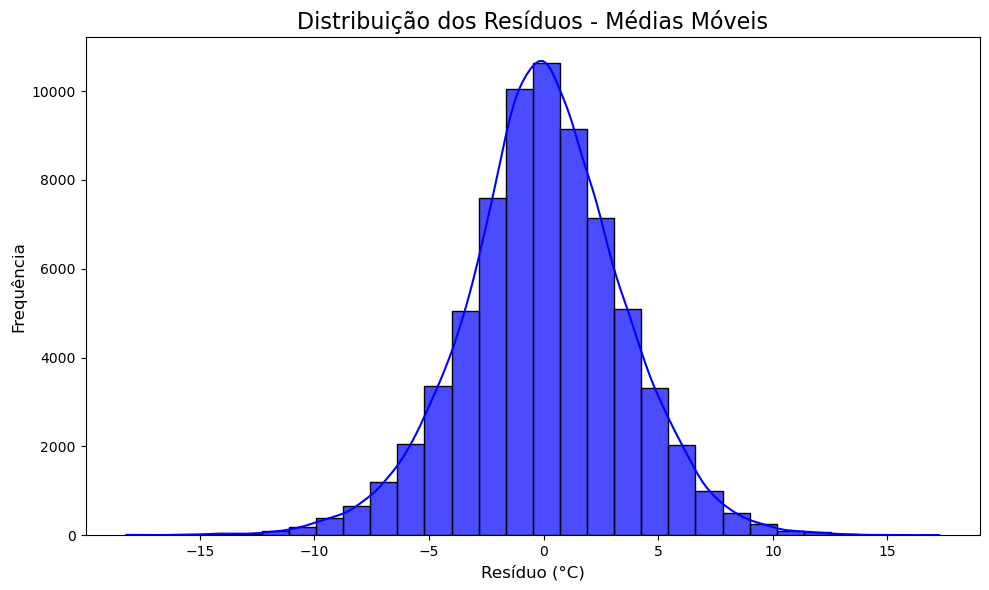

In [68]:
# Histograma da distribuição dos resíduos
# (com a linha de densidade)
plt.figure(figsize=(10, 6))

sns.histplot(tab_sem_dados_faltantes['Residuos'], 
             bins=30, 
             kde=True, 
             color='blue', 
             alpha=0.7)

plt.title('Distribuição dos Resíduos - Médias Móveis', 
          fontsize=16)
plt.xlabel('Resíduo (°C)',
           fontsize=12)
plt.ylabel('Frequência',
           fontsize=12)

plt.tight_layout()
plt.show()

O histograma mostrado possui a silhueta em formato de sino, comportamento esperado de uma **Distribuição Normal**, isto é, as maiores frequências dos acontecimentos concentram-se no centro da distribuição, que passam a diminuírem gradativamente para a direita e para a esquerda de forma simétrica. Além do mais, essa distribuição possui uma característica particular: média em torno do zero, sinalizando uma Distribuição Normal Padrão. Entretanto, esses comentários são apenas suposições com base em um primeiro olhar, que devem ser validadas através de um teste estatístico.

Existem vários testes que podem ser aplicados, sendo os mais comuns: Teste Shapiro-Wilk e Kolmogorov-Smirnov.

O **Teste de Shapiro-Wilk** é um teste estatístico usado para verificar se um conjunto de dados segue uma distribuição normal. Ele é amplamente utilizado devido à sua alta potência para detectar desvios da normalidade, especialmente em amostras pequenas e médias. Suas hipóteses são:

* $H_0$ : os dados seguem uma distribuição normal.

* $H_1$ : os dados não seguem uma distribuição normal.

In [ ]:
# Verificando o tamanho da coluna "Residuos"
len(tab_sem_dados_faltantes['Residuos'])

69978

In [75]:
# Aplicando o Teste de Shapiro-Wilk
estatistica, p_valor = shapiro(tab_sem_dados_faltantes['Residuos'])
print('Estatística do teste:', estatistica)
print('p-valor:', p_valor)

# Validando o p-valor com nível de significância de 5%
if p_valor > 0.05:
    print("\nLogo, os resíduos seguem uma distribuição normal.")
else:
    print("\nLogo, os resíduos não seguem uma distribuição normal.")


Estatística do teste: 0.9953276017191135
p-valor: 1.1453104178131393e-39

Logo, os resíduos não seguem uma distribuição normal.


O teste aplicado rejeitou as suposições realizadas anteriormente, evidenciando que os resíduos não seguem uma distribuição normal. Como o modelo proposto não utiliza esse requisito para poder ser usado, esse resultado não influencia nas tomadas de decisões e na sua aplicabilidade.

### 8.2.5 Conclusão sobre o Modelo de Médias Móveis

Isto posto, foi identificado que, através da métrica MAE, há um erro absoluto médio de $2.55\text{°C}$, podendo variar para cima ou para baixo, de acordo com o Modelo Baseline proposto: **Modelo de Médias Móveis**. 

Para saber se há um modelo mais complexo com um menor erro, será apresentado um modelo de Aprendizado de Máquina: **Random Forest**.

# 9. Proposta de um modelo mais complexo 

## 9.1 Aprendizado de máquina

Antes de aplicar um modelo mais complexo, é interessante entender alguns conceitos para que faça sentido e explique o porquê do seu uso em dado contexto.

**Aprendizado de máquina** é a capacidade de melhorar o desempenho de uma tarefa por meio da experiência dos dados observados. 

Como exemplo de modelo dessa técnica, tem-se o **Random Forest** (Floresta Aleatória).

## 9.2 Random Forest

O **Random Forest** é baseado em árvores de decisão (estrutura de dados que representa uma sequência de decisões e suas consequências). Ele pertence à classe dos métodos ensemble, que combinam vários modelos para melhorar a precisão e reduzir o risco de overfitting. Possui característica de ser resistente a outliers e dados ruidosos.

Seu método consiste em construir várias árvores de decisão a partir de diferentes amostras do conjunto de dados. No caso do Random Forest, utiliza-se a amostragem bootstrap, na qual são geradas amostras de mesmo tamanho com base na amostra original, sendo que um mesmo elemento pode ser selecionado mais de uma vez (com reposição). É uma amostragem que não requer suposições sobre a distribuição dos dados, além de ser simples de implementar. Contudo, ela possui suas limitações, já que para grandes conjuntos de dados não é eficiente (custosa computacionalmente).

O **objetivo** do Random Forest é treinar o sistema para que ele consiga, com base nesse aprendizado, prever o que acontece quando novos dados entram. Basicamente, segue os seguintes passos: 

1. seleciona variáveis de forma aleatória;
2. constrói uma árvore de decisão utilizando subconjuntos de dados (criação de ramos);
3. realiza cálculos utilizando as amostras escolhidas para definir qual variável será a raiz;
4. passa para o próximo nó (nível mais baixo de uma árvore de decisão), onde seleciona duas ou mais variáveis, sempre excluindo das opções as variáveis que foram utilizadas no nó anterior;
5. repete o processo por diversas vezes.

**Obs.:** a quantidade de variáveis costuma ser definida no momento da criação do próprio modelo.

### 9.2.1 Preparação dos dados

Como início do tratamentos dos dados, será calculada a média das variáveis de cada mês e ano. Serão ultilizadas todas as variáveis do dataset original, com exceção da temperatura em Kelvin, pois o próprio modelo irá dizer quais são importantes.

In [77]:
# Calculando a média das variáveis por mês e ano (2009 - 2016)
rf_media_variaveis = dados_filtrado.groupby(['Ano', 'Mes'])[[
    'p (mbar)', 'Tdew (degC)', 'rh (%)',
    'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
    'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
    'wd (deg)']].mean().reset_index()

# Visualizando
rf_media_variaveis

,Ano,Mes,p (mbar),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009,1,988.988075,-5.887934,84.992651,5.000858,4.196778,0.804076,2.652147,4.256180,1276.954094,1.784855,2.892657,150.870558
1,2009,2,985.634010,-2.186749,84.723492,6.352691,5.353219,0.999516,3.388271,5.435491,1253.876491,2.045833,3.498914,193.228611
2,2009,3,986.123026,0.353797,78.468752,8.288454,6.389973,1.898461,4.044017,6.485105,1236.608163,2.429601,4.088239,201.683315
3,2009,4,987.523086,5.742546,69.176981,14.639894,9.316218,5.323556,5.892667,9.439019,1202.978444,1.853863,3.121630,143.162153
4,2009,5,992.105999,7.815836,70.967000,16.044648,10.835849,5.208658,6.826414,10.927278,1201.285078,2.080842,3.556891,168.264149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,9,992.078257,11.849588,72.483947,20.920725,14.044419,6.876130,8.856583,14.160780,1183.434481,1.528646,2.636215,158.686704
93,2016,10,993.458726,6.542717,87.008460,11.454884,9.821164,1.633712,6.173093,9.886619,1223.408268,1.726624,2.850231,162.320662
94,2016,11,989.398227,1.191595,83.936486,8.364961,6.874449,1.490440,4.340461,6.958722,1241.522368,2.058035,3.295363,175.228891
95,2016,12,1001.917278,-0.448255,84.356149,7.345468,6.108672,1.236812,3.803788,6.100430,1265.880836,1.659088,2.960549,192.826237


In [78]:
# Criando a variável com o ano e o mês juntos
rf_media_variaveis['Ano_Mes'] = rf_media_variaveis['Ano'].astype(
    str) + '-' + rf_media_variaveis['Mes'].astype(str).str.zfill(2)

### 9.2.2 Análise descritiva

In [79]:
# Criando uma lista das variáveis que serão plotadas no gráfico de linha
rf_lista_veriaveis = ['p (mbar)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 
                      'VPact (mbar)','VPdef (mbar)', 'sh (g/kg)', 
                      'H2OC (mmol/mol)', 'rho (g/m**3)','wv (m/s)', 
                      'max. wv (m/s)', 'wd (deg)']

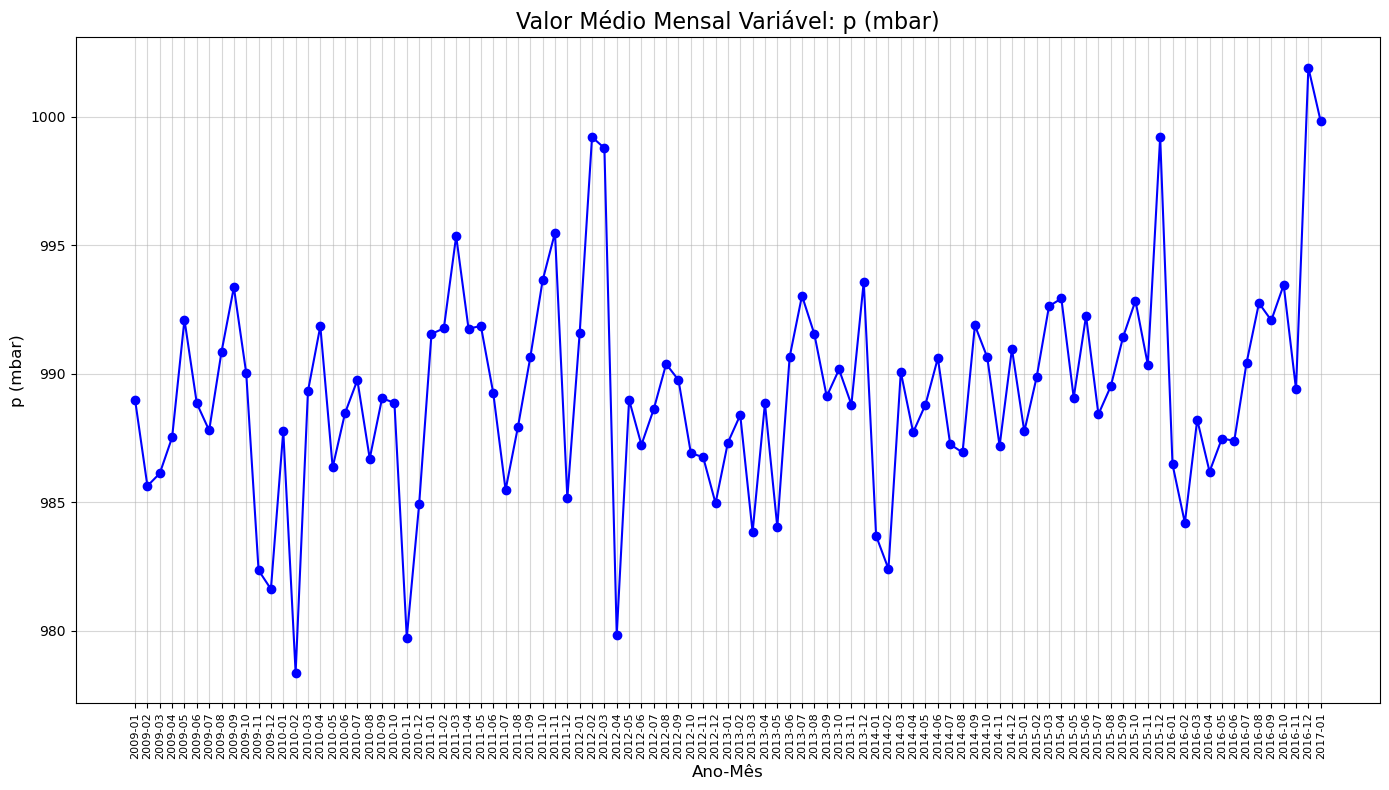

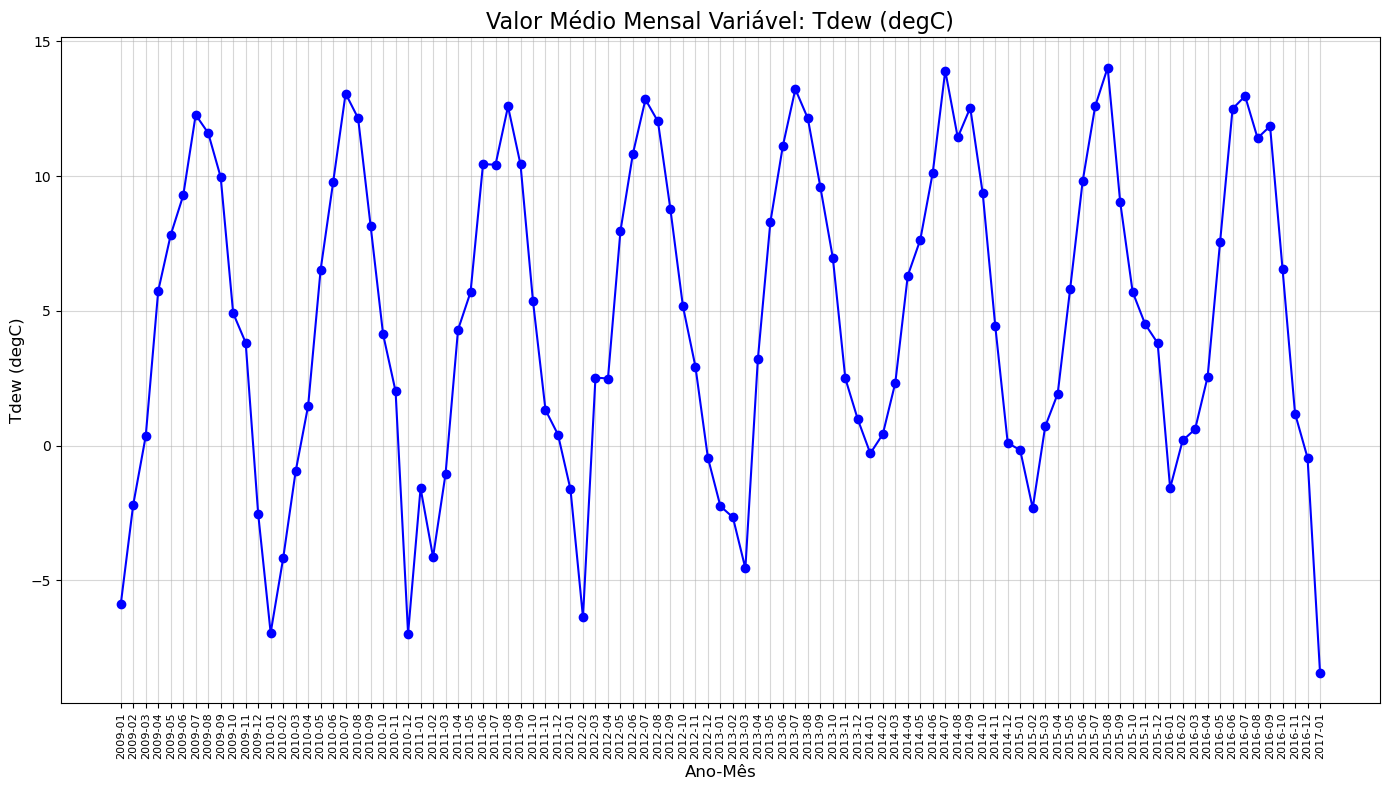

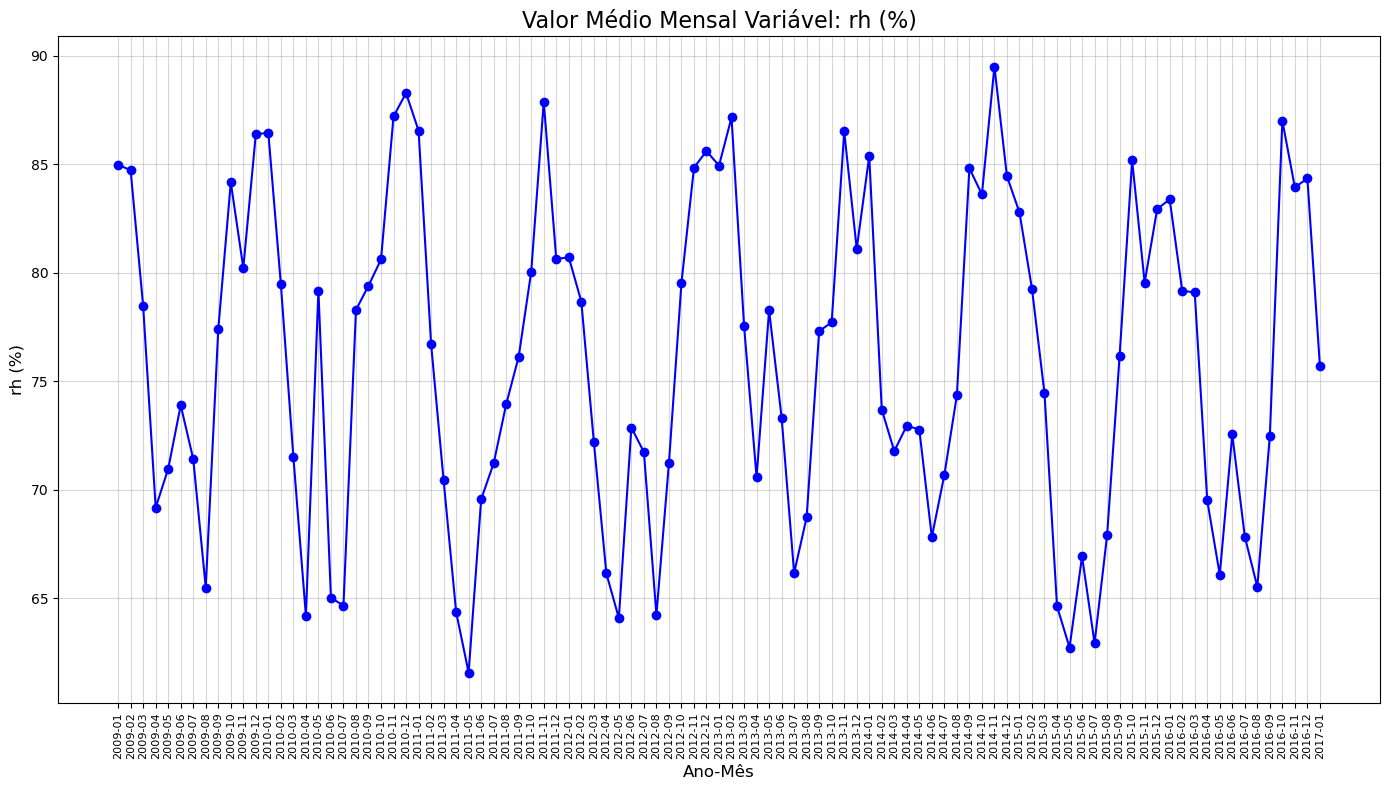

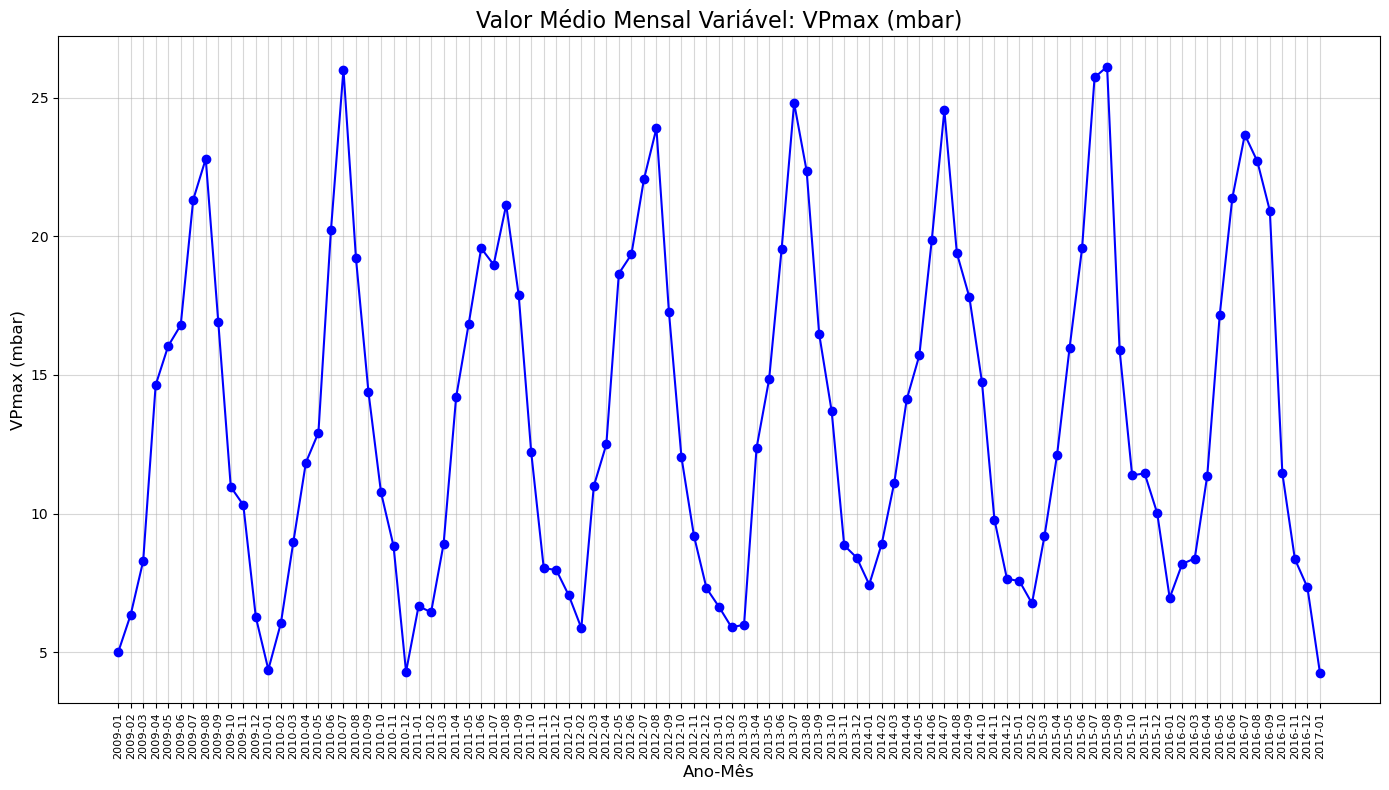

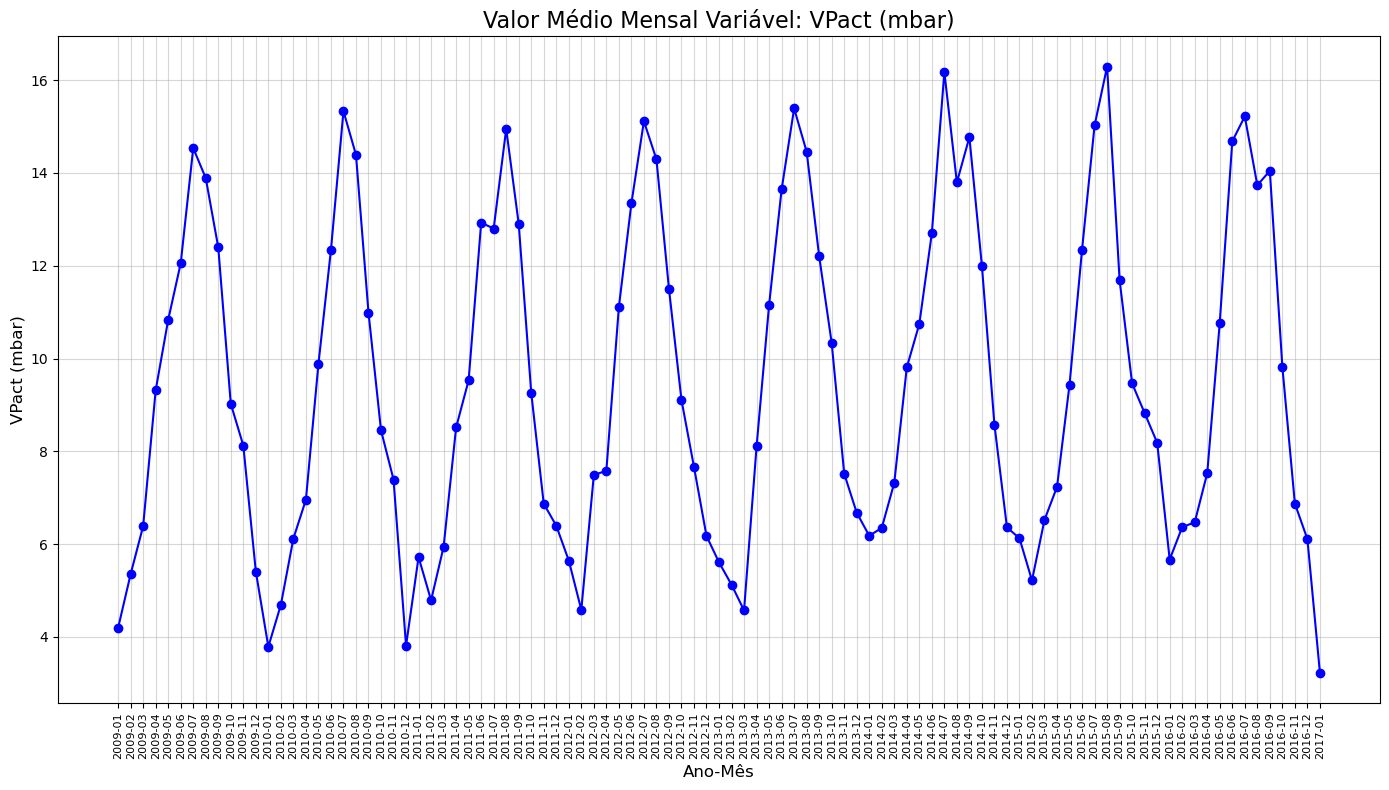

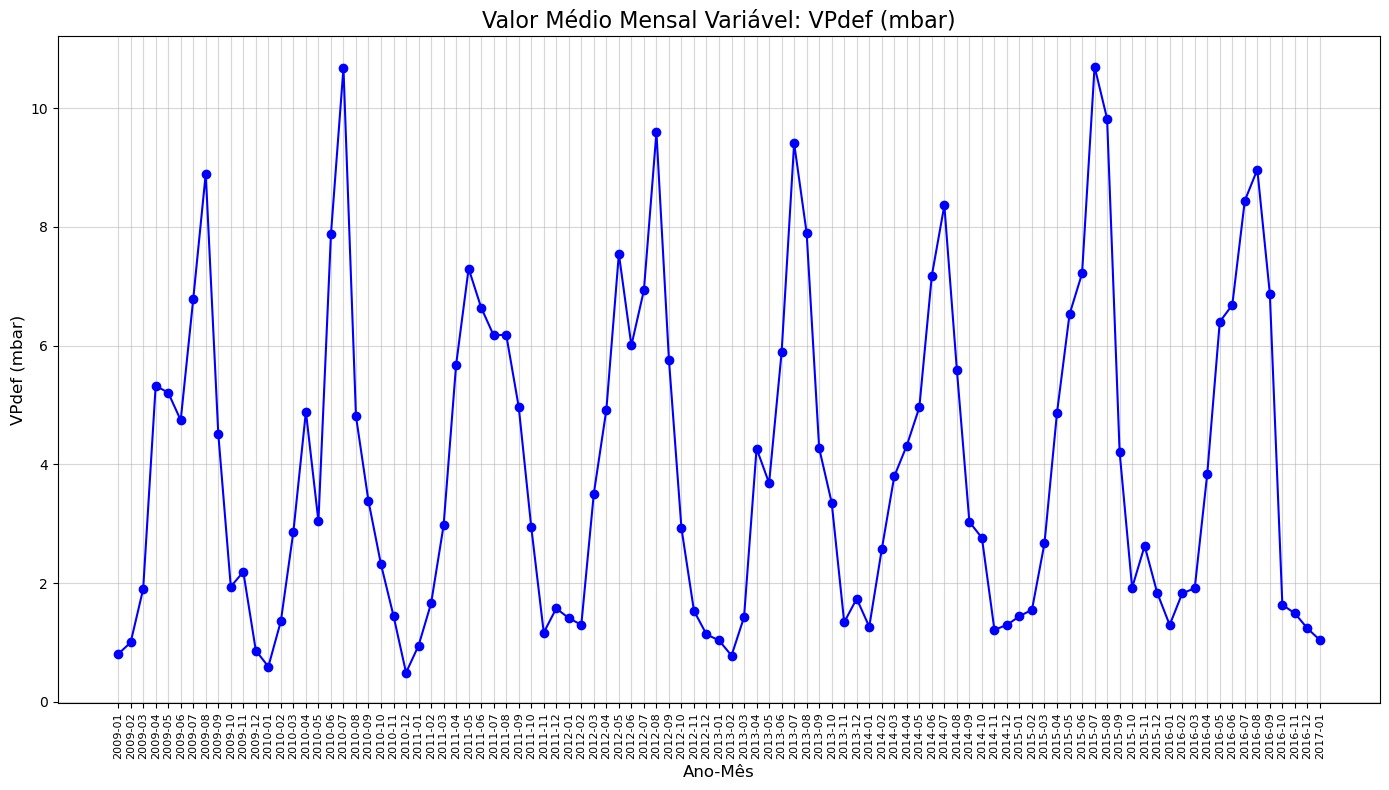

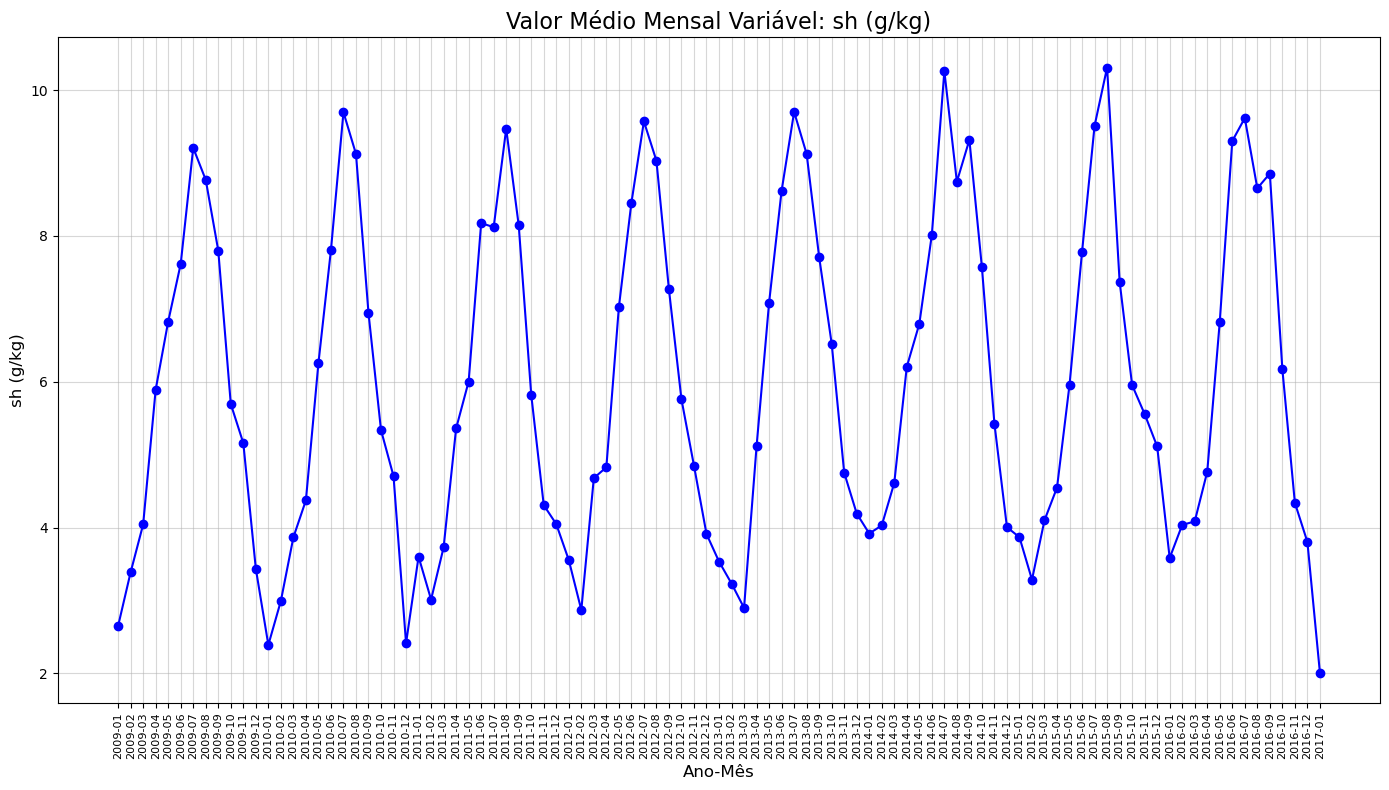

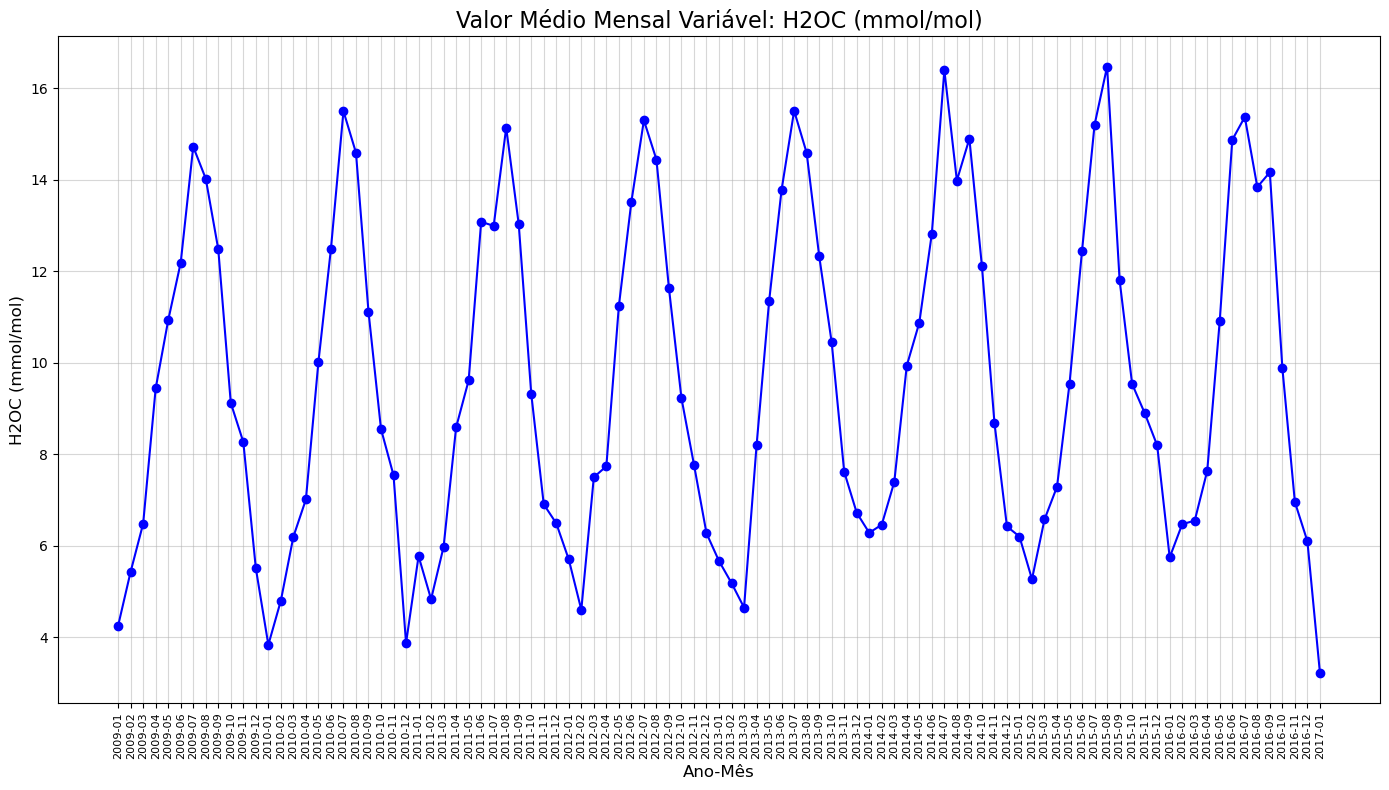

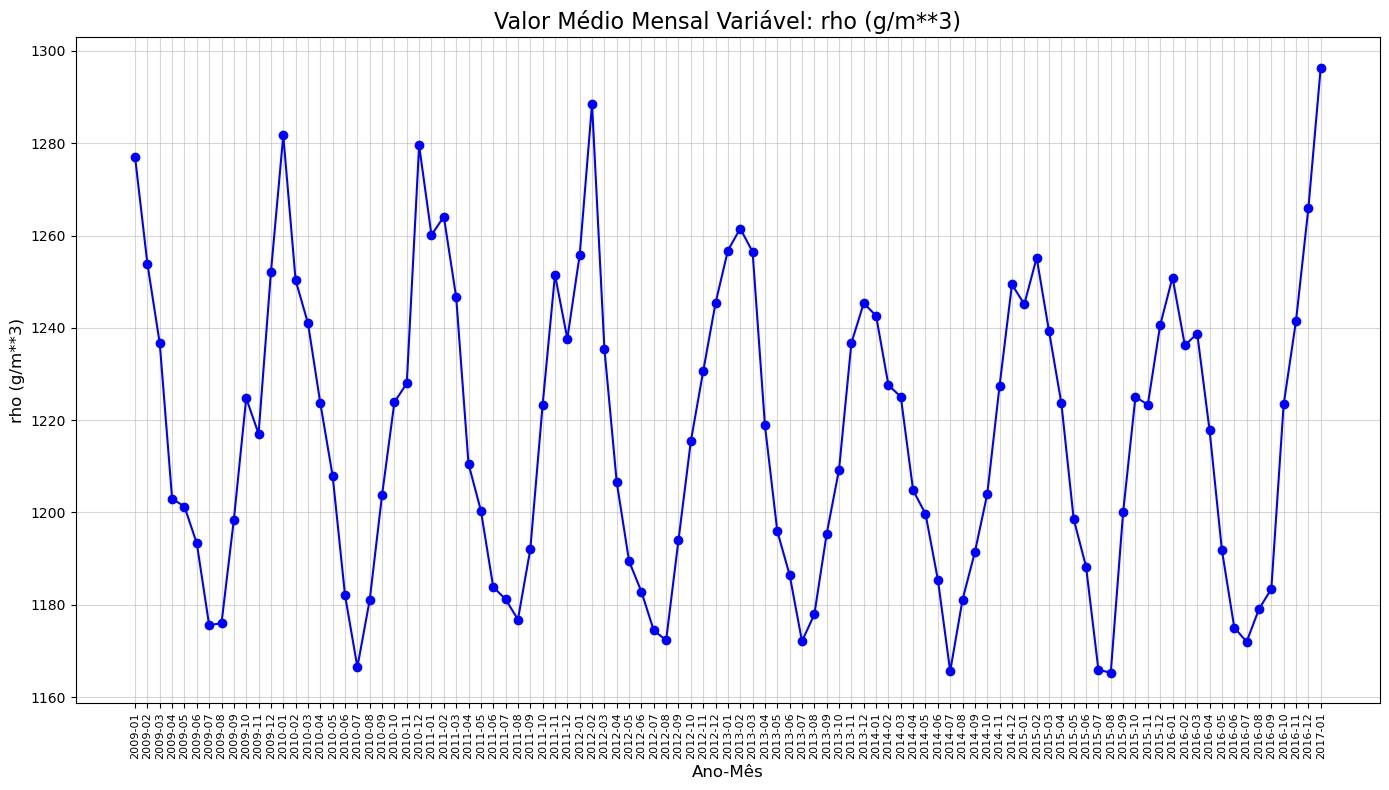

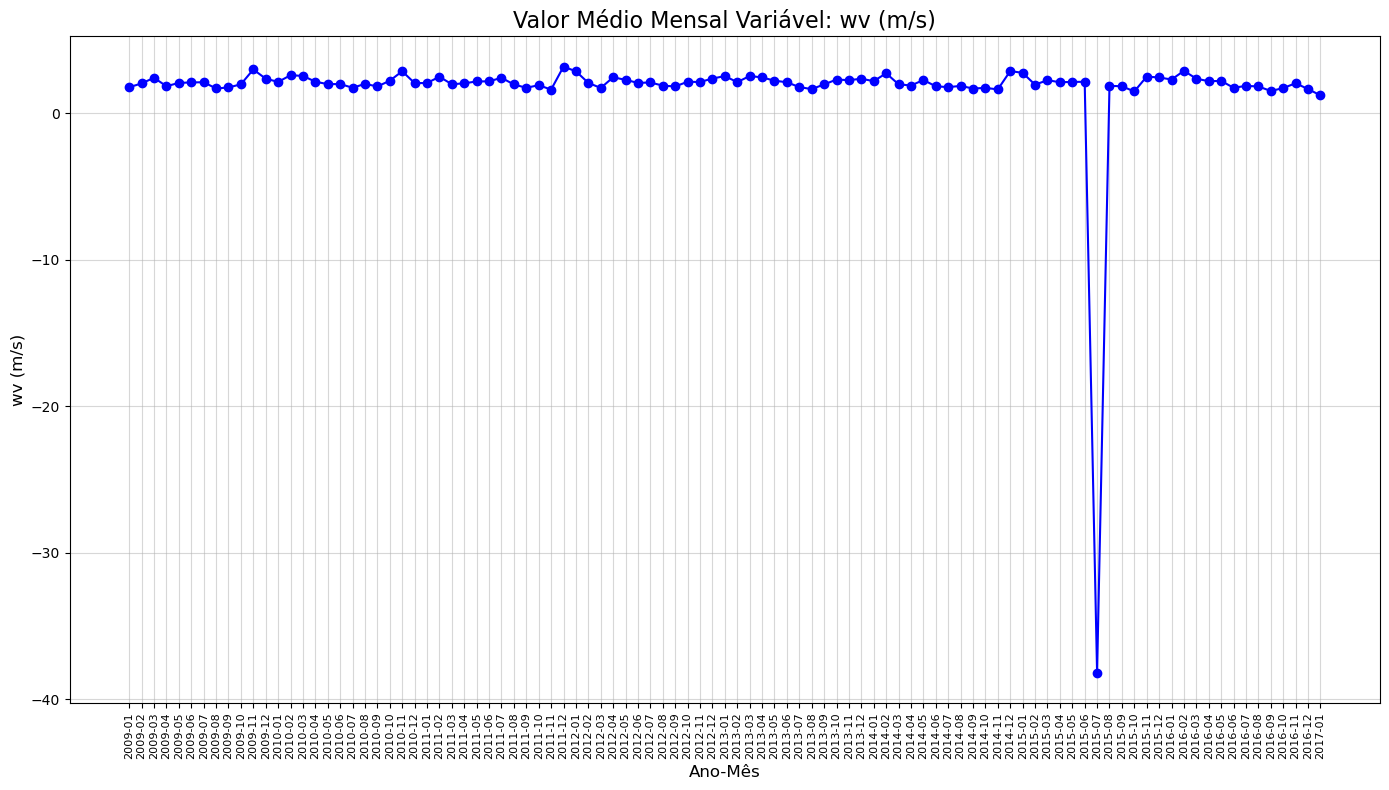

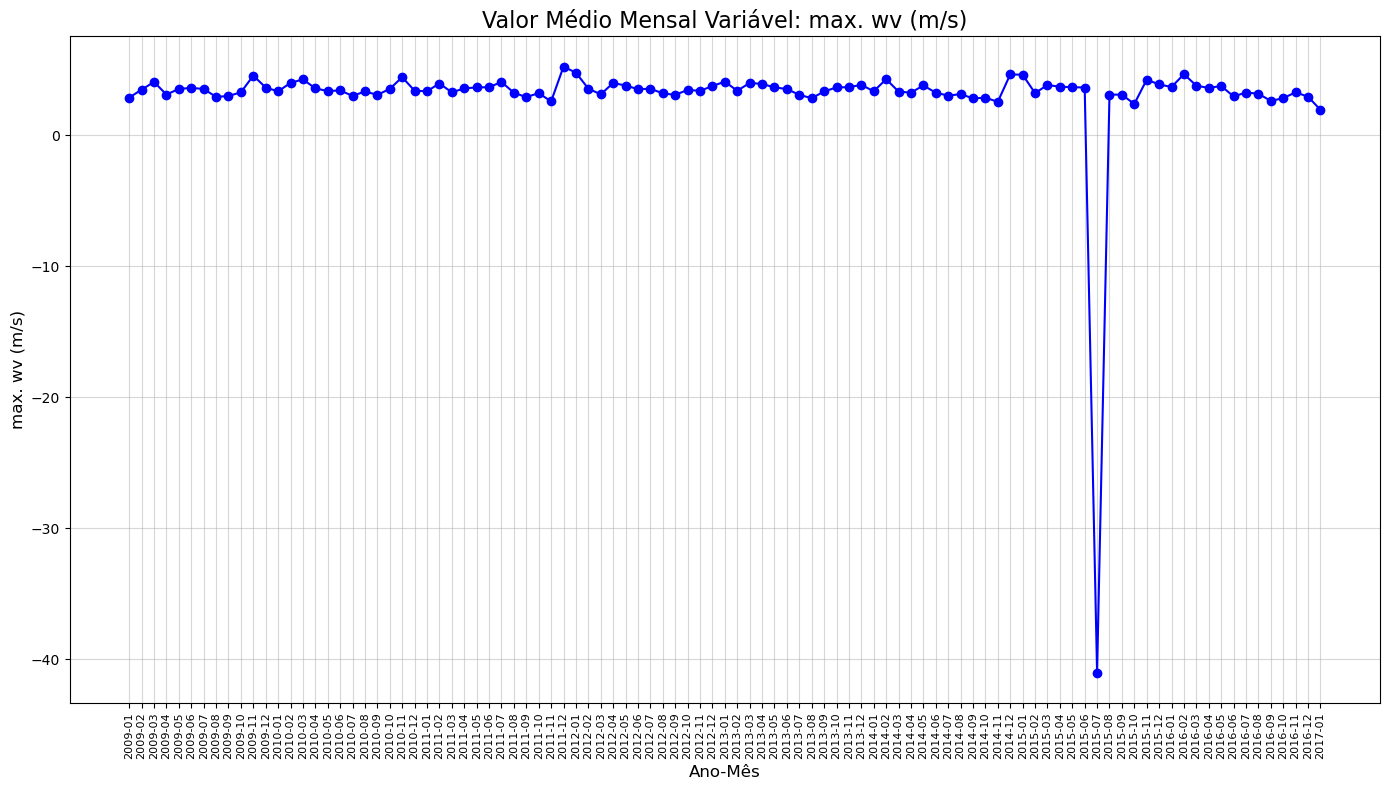

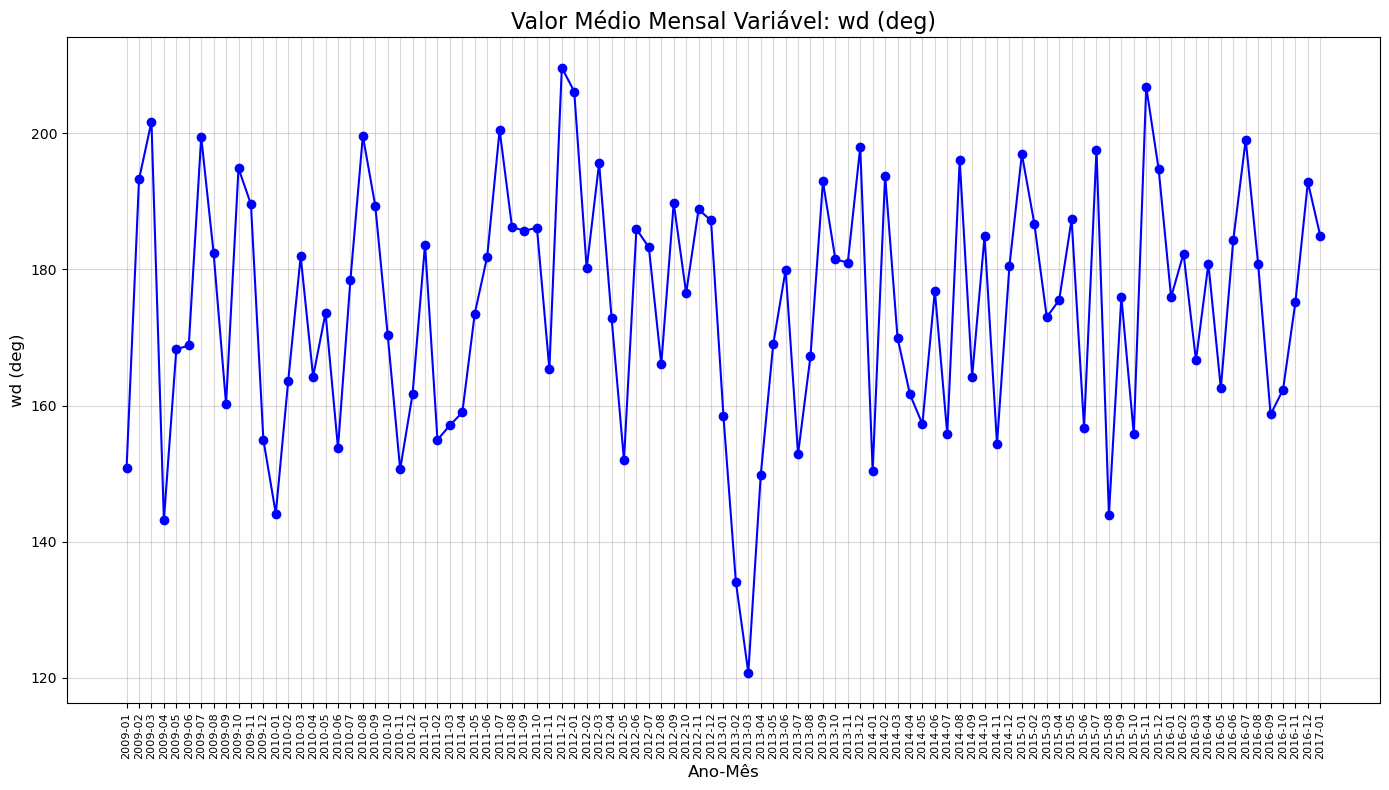

In [81]:
# Gráfico de linhas do valor médio mensal para cada variável

# Iterando para todos os anos
for col in rf_lista_veriaveis:
   plt.figure(figsize=(14, 8))

   plt.plot(rf_media_variaveis['Ano_Mes'], 
            rf_media_variaveis[col], 
            marker='o', 
            color='blue')
   
   plt.xticks(ticks=range(len(rf_media_variaveis)), 
              labels=rf_media_variaveis['Ano_Mes'], 
              rotation=90, 
              fontsize=8)
   
   plt.title('Valor Médio Mensal Variável: ' + col, 
             fontsize=16)
   plt.xlabel('Ano-Mês', 
              fontsize=12)
   plt.ylabel(col, 
              fontsize=12)
   plt.grid(alpha=0.5)

   plt.tight_layout()
   plt.show()

Com os gráficos plotados acima, observa-se que as variáveis "Tdew (degC)", "VPmax (mbar)", "VPact (mbar)", "sh (g/kg)", "H2OC (mmol/mol)" e "rho (g/m**3)" possuem uma tendência e uma sazonalidade, apresentando de tempos em tempos, picos e vales (marcadas pela passagem dos anos). As variáveis "p (mbar)", "rh (%)", "VPdef (mbar)", "wv (m/s)", "max. wv (m/s)" e "wd (deg)" não apresentam um comportamento que se repete ao longo do tempo. 

Além disso, as variáveis "wv (m/s)" e "max. wv (m/s)", relacionadas à velocidade do vento, quase não variam, flutuando em torno de $1$ a $3 m/s$ (baixa amplitude). Contudo, em ambos os gráficos, foi percebida uma anomalia no mesmo mês e no mesmo ano, julho de 2015, sendo registrada uma velocidade de aproximadamente $-40 m/s$.

Olhando para 2016, dentre as variáveis com sazonalidade, todas tendem a ter um pico entre julho e setembro, com exceção da "rho (g/m**3)" (densidade do ar) que apresenta um comportamento oposto: possui seu menor valor (vale).

### 9.2.3 Preparação dos dados para a modelagem

Nessa etapa, define-se as variáveis que serão utilizadas para a aplicação do modelo. Também é a parte em que são determinados os dados de treino e teste.

Será seperada a última data do dataset, que irá ser usada mais a frente, pois ela não possui os valores reais. Além disso, a tabela com os dados utilizados na predição do Modelo de Médias Móveis terá as linhas com dados faltantes removidas.

In [82]:
# Separando a última data
rf_ultima_data = dados_model_base_final[dados_model_base_final[
    'Data_Hora'] >= '2016-12-31']

# Removendo as linhas com dados faltantes
rf_tab_sem_dados_faltantes = dados_model_base_final.dropna()

# Visualizando
rf_tab_sem_dados_faltantes.tail(3)

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h
70014,-2.801667,2016-12-30 22:00:00,2016-12-31 22:00:00,-3.553333,-2.372222
70015,-3.586667,2016-12-30 23:00:00,2016-12-31 23:00:00,-3.746667,-2.881667
70016,-4.116667,2016-12-31 00:00:00,2017-01-01 00:00:00,-4.820000,-3.501667


Agora, realiza-se a junção das tabelas criadas acima, separadamente, com a tabela que contém os dados filtrados e a variável resposta.

In [83]:
# Unindo os dados sem valores faltantes com a tabela de dados filtrados
rf_dados_modelo = rf_tab_sem_dados_faltantes.merge(
    dados_filtrado,
    how = 'inner',
    left_on = 'Data_Hora',
    right_on = 'Date Time')

# Visualizando
rf_dados_modelo.tail(3)

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Ano,Mes,Dia,Hora,Nome_Mes
70026,-2.801667,2016-12-30 22:00:00,2016-12-31 22:00:00,-3.553333,-2.372222,2016-12-30 22:00:00,1008.93,-2.63,-4.99,83.7,5.03,4.21,0.82,2.60,4.17,1297.15,1.01,1.28,198.1,2016,12,30,22,Dezembro
70027,-3.586667,2016-12-30 23:00:00,2016-12-31 23:00:00,-3.746667,-2.881667,2016-12-30 23:00:00,1008.82,-2.98,-4.85,86.9,4.90,4.26,0.64,2.63,4.22,1298.68,0.43,1.04,192.6,2016,12,30,23,Dezembro
70028,-4.116667,2016-12-31 00:00:00,2017-01-01 00:00:00,-4.820000,-3.501667,2016-12-31 00:00:00,1008.67,-4.09,-5.22,91.8,4.51,4.14,0.37,2.56,4.10,1303.88,0.97,1.78,169.5,2016,12,31,0,Dezembro


In [84]:
# Unindo a última data com a tabela dos dados filtrados
rf_ultima_data = rf_ultima_data.merge(
    dados_filtrado,
    how = 'inner',
    left_on = 'Data_Hora',
    right_on = 'Date Time')

# Visualizando
rf_ultima_data.tail(3)

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Ano,Mes,Dia,Hora,Nome_Mes
22,-3.553333,2016-12-31 22:00:00,2017-01-01 22:00:00,NaN,-2.903333,2016-12-31 22:00:00,1000.70,-2.59,-7.04,71.3,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15,2016,12,31,22,Dezembro
23,-3.746667,2016-12-31 23:00:00,2017-01-01 23:00:00,NaN,-3.317778,2016-12-31 23:00:00,1000.21,-3.76,-7.95,72.5,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70,2016,12,31,23,Dezembro
24,-4.820000,2017-01-01 00:00:00,2017-01-02 00:00:00,NaN,-4.040000,2017-01-01 00:00:00,999.82,-4.82,-8.42,75.7,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.90,2017,1,1,0,Janeiro


In [85]:
# Verificando a dimensão das tabelas
# (se possuem a mesma quantidade de colunas)
rf_dados_modelo.shape, rf_ultima_data.shape

((70029, 24), (25, 24))

In [86]:
# Retirando as variáveis que não serão usadas pra treinar o modelo
rf_dados_modelo_final = rf_dados_modelo.drop(columns=[
    'Data_Hora',
    'Media_3h',
    'Date Time',
    'Ano',
    'Nome_Mes'])

rf_ultima_data_final = rf_ultima_data.drop(columns=[
    'Data_Hora',
    'Media_3h',
    'Date Time',
    'Ano',
    'Nome_Mes',
    'Data_Hora_Mais_24h',
    'Media_Temp_24h'])

### 9.2.4 Modelagem

Nesse momento, separam-se os dados em bases de treino e teste. A base de treino será composta por datas de 01/01/2009 a 31/12/2015 e, a base de teste, por datas de 01/01/2016 a 31/12/2016.

In [87]:
# Definindo os dados de treino
base_treino = rf_dados_modelo_final[rf_dados_modelo_final[
    'Data_Hora_Mais_24h'] < '2016-01-01']

# Visualizando
base_treino.tail(1)

,Media_Temp,Data_Hora_Mais_24h,Media_Temp_24h,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Mes,Dia,Hora
61341,-0.363333,2015-12-31 23:00:00,0.181667,997.96,-0.33,-3.77,77.5,5.96,4.62,1.34,2.88,4.63,1272.02,2.36,3.99,197.0,12,30,23


In [88]:
# Definindo os dados de teste
base_teste = rf_dados_modelo_final[rf_dados_modelo_final[
    'Data_Hora_Mais_24h'] >= '2016-01-01']

# Visualização
base_teste.tail(1)

,Media_Temp,Data_Hora_Mais_24h,Media_Temp_24h,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Mes,Dia,Hora
70028,-4.116667,2017-01-01,-4.82,1008.67,-4.09,-5.22,91.8,4.51,4.14,0.37,2.56,4.1,1303.88,0.97,1.78,169.5,12,31,0


In [89]:
# Dividindo as variáveis X e y em treino e teste
X_treino = base_treino.drop(columns = ['Media_Temp_24h', 'Data_Hora_Mais_24h'])
y_treino = base_treino['Media_Temp_24h']

X_teste = base_teste.drop(columns = ['Media_Temp_24h', 'Data_Hora_Mais_24h'])
y_teste = base_teste['Media_Temp_24h']

In [90]:
# Verificando as dimensões das variáveis
X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

((61342, 17), (61342,), (8687, 17), (8687,))

Logo, com os dados divididos em treino e teste, pode-se aplicar a classe "RandomForestRegressor" da biblioteca scikit-learn usada para criar um modelo de regressão baseado no algoritmo Random Forest. Nela, defini-se o número de árvores de decisão que serão criadas no modelo ("n_estimators"). Também é de fundamental importância definir a semente para a geração de números aleatórios, garantindo que os resultados sejam reproduzíveis. O número $42$ é apenas uma convenção, mas qualquer número poderia ser usado.

In [91]:
# Aplicando o algoritmo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

Após isso, o modelo deve ser ajustado aos dados de treino, em que:

* **X_treino:** representa as variáveis independentes (preditoras) usadas para treinar o modelo;
* **y_treino:** representa a variável dependente (alvo) que o modelo tentará prever, no caso a temperatura para as próximas $24h$.

É durante o ajuste que combina as previsões das árvores para criar o modelo final. Como é uma regressão, ele calcula a **média** das previsões de todas as árvores.

In [92]:
# Ajuste do modelo para os dados de treino
modelo_rf.fit(X_treino, y_treino)

RandomForestRegressor(random_state=42)

Após o treinamento, utiliza-se o modelo para prever novos valores com o método "predict". Nele, utilizam-se:

* **X_teste:** dados com as mesmas variáveis dos dados de treino, mas sem os valores da variável dependente;
* **y_pred:** saída com o resultado das previsões feitas pelo modelo com base nos dados fornecidos.

In [93]:
# Prevendo a temperatura com base nos dados de teste
# e acrescentando na base
base_teste['y_pred'] = modelo_rf.predict(X_teste)

# Visualizando
base_teste.tail(2)

,Media_Temp,Data_Hora_Mais_24h,Media_Temp_24h,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Mes,Dia,Hora,y_pred
70027,-3.586667,2016-12-31 23:00:00,-3.746667,1008.82,-2.98,-4.85,86.9,4.90,4.26,0.64,2.63,4.22,1298.68,0.43,1.04,192.6,12,30,23,-2.21710
70028,-4.116667,2017-01-01 00:00:00,-4.820000,1008.67,-4.09,-5.22,91.8,4.51,4.14,0.37,2.56,4.10,1303.88,0.97,1.78,169.5,12,31,0,0.11625


In [ ]:
# Prevendo a temperatura na última data
# e acrescentando na tabela
rf_ultima_data['y_pred'] =  modelo_rf.predict(
    rf_ultima_data_final)

# VisSualizando
rf_ultima_data.tail(2)

,Media_Temp,Data_Hora,Data_Hora_Mais_24h,Media_Temp_24h,Media_3h,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Ano,Mes,Dia,Hora,Nome_Mes,y_pred
23,-3.746667,2016-12-31 23:00:00,2017-01-01 23:00:00,NaN,-3.317778,2016-12-31 23:00:00,1000.21,-3.76,-7.95,72.5,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.7,2016,12,31,23,Dezembro,-2.269783
24,-4.820000,2017-01-01 00:00:00,2017-01-02 00:00:00,NaN,-4.040000,2017-01-01 00:00:00,999.82,-4.82,-8.42,75.7,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9,2017,1,1,0,Janeiro,-3.626433


In [95]:
# Removendo colunas desnecessárias
rf_ultima_data = rf_ultima_data.drop(columns=[
    'Media_3h','Date Time','Data_Hora','Ano','Nome_Mes'])

# Selecionando apenas a última data
rf_ultima_data = rf_ultima_data[rf_ultima_data[
    'Data_Hora_Mais_24h'] >= '2017-01-01']

In [96]:
# Juntando as tabelas com os dados de teste e com a última data
dados_plot = pd.concat([base_teste, rf_ultima_data])

In [97]:
# Visualizando os dados preditos
dados_plot.head()

,Media_Temp,Data_Hora_Mais_24h,Media_Temp_24h,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Mes,Dia,Hora,y_pred
61342,-0.563333,2016-01-01 00:00:00,0.025000,997.32,-0.45,-4.69,72.90,5.91,4.31,1.60,2.69,4.32,1271.91,3.05,4.89,178.2,12,31,0,2.220867
61343,-0.373333,2016-01-01 01:00:00,-0.496667,996.61,-0.47,-5.57,68.23,5.90,4.03,1.88,2.52,4.04,1271.21,3.89,5.61,179.5,12,31,1,2.412700
61344,-0.168333,2016-01-01 02:00:00,-1.085000,996.35,-0.34,-6.15,64.64,5.96,3.85,2.11,2.41,3.87,1270.34,2.63,3.85,177.6,12,31,2,2.525767
61345,0.158333,2016-01-01 03:00:00,-1.796667,995.91,0.35,-6.92,57.96,6.27,3.63,2.63,2.27,3.65,1266.71,5.21,7.41,173.0,12,31,3,2.869483
61346,-0.131667,2016-01-01 04:00:00,-1.943333,995.42,0.04,-6.99,58.97,6.12,3.61,2.51,2.26,3.63,1267.55,4.66,7.05,176.4,12,31,4,1.947917


In [98]:
# Visualizando os dados preditos
dados_plot.tail()

,Media_Temp,Data_Hora_Mais_24h,Media_Temp_24h,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Mes,Dia,Hora,y_pred
20,-2.503333,2017-01-01 20:00:00,NaN,1001.47,-1.52,-7.13,65.42,5.46,3.57,1.89,2.22,3.57,1282.60,1.24,1.96,232.00,12,31,20,-1.655900
21,-2.653333,2017-01-01 21:00:00,NaN,1001.29,-3.09,-7.09,73.70,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50,12,31,21,-1.855517
22,-3.553333,2017-01-01 22:00:00,NaN,1000.70,-2.59,-7.04,71.30,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15,12,31,22,-1.876900
23,-3.746667,2017-01-01 23:00:00,NaN,1000.21,-3.76,-7.95,72.50,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70,12,31,23,-2.269783
24,-4.820000,2017-01-02 00:00:00,NaN,999.82,-4.82,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.90,1,1,0,-3.626433


Feito isso, temos os **resultados** da previsão da temperatura para as próximas $24h$ de acordo com o modelo Random Forest, que utilizou $100$ árvores de decisão e calculou a média das previsões entre todas essas árvores. 

### 9.2.5 Gráfico de linhas do Modelo Random Forest

Sendo assim, com o resultado esperado calculado, será plotado um gráfico de linhas que mostrará a temperatura real em comparação com a temperatura predita, com ambas em graus Celsius. O intervalo de tempo considerado será de 30/12/2016 a 01/01/2017, a fim de facilitar a visualização.

In [99]:
# Criando uma tabela com os dias 30 e 31/12/2016
# e com o dia 01/01/2017
rf_dados_preditos_dez = dados_plot[dados_plot['Data_Hora_Mais_24h'] >= '2016-12-30']

# Visualizando
rf_dados_preditos_dez.tail(2)

,Media_Temp,Data_Hora_Mais_24h,Media_Temp_24h,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Mes,Dia,Hora,y_pred
23,-3.746667,2017-01-01 23:00:00,NaN,1000.21,-3.76,-7.95,72.5,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.7,12,31,23,-2.269783
24,-4.820000,2017-01-02 00:00:00,NaN,999.82,-4.82,-8.42,75.7,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9,1,1,0,-3.626433


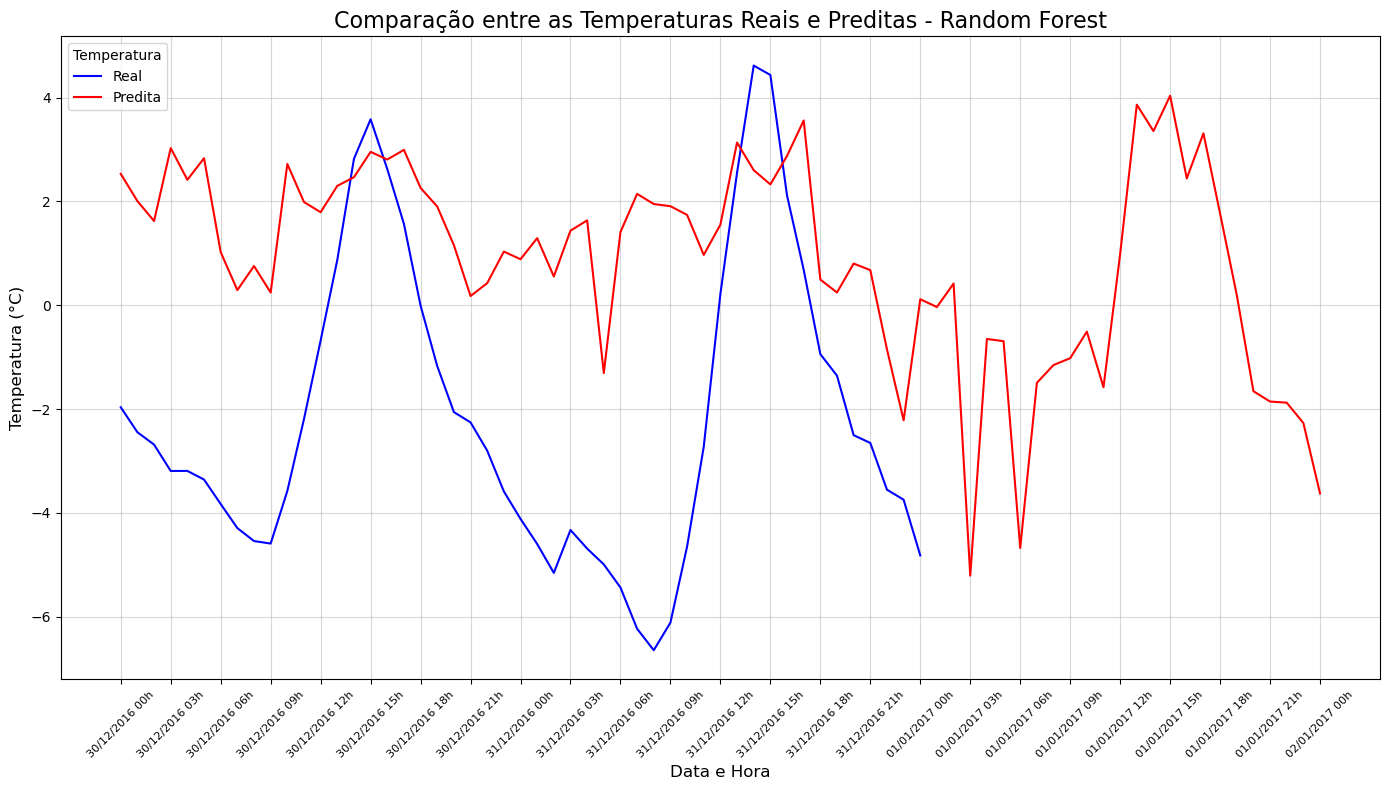

In [102]:
# Configurando o eixo "x" 
rf_data_inicial = rf_dados_preditos_dez['Data_Hora_Mais_24h'].min()  
rf_data_final = rf_dados_preditos_dez['Data_Hora_Mais_24h'].max() 
rf_datas_especificas = pd.date_range(start=rf_data_inicial, 
                                     end=rf_data_final, 
                                     freq='3h')  

# Plotando o gráfico de linhas com as previsões
plt.figure(figsize=(14, 8))

plt.plot(rf_dados_preditos_dez['Data_Hora_Mais_24h'], 
         rf_dados_preditos_dez['Media_Temp_24h'], 
         color="blue", 
         label="Real")

plt.plot(rf_dados_preditos_dez['Data_Hora_Mais_24h'], 
         rf_dados_preditos_dez['y_pred'], 
         color="red", 
         label="Predita")

plt.xticks(
    ticks=rf_datas_especificas, 
    labels=[data.strftime('%d/%m/%Y %Hh') 
            for data in rf_datas_especificas],
    rotation=45,
    fontsize=8)

plt.title('Comparação entre as Temperaturas Reais e Preditas - Random Forest', 
          fontsize=16)
plt.xlabel('Data e Hora', 
           fontsize=12)
plt.ylabel('Temperatura (°C)', 
           fontsize=12)
plt.grid(alpha=0.5)
plt.legend(title='Temperatura', 
           fontsize=10, 
           loc='upper left')

plt.tight_layout()
plt.show()

Com base no gráfico de linhas acima, foram definidas datas a partir do dia 30 de dezembro de 2016. A linha em azul representa as temperaturas reais, ou seja, as temperaturas fornecidas no conjunto de dados. Já a linha vermelha, retrata as temperaturas preditas pelo Modelo Random Forest. É observado que os valores preditos para o primeiro dia de janeiro de 2017 se assemelham com os valores reais do dia anterior, atingindo o pico entre $13h$ e $15h$.

Agora, para saber a performance do modelo, aplica-se a métrica MAE.

### 9.2.6 Aplicação da métrica MAE - Random Forest

No modelo Random Forest, como temos os dados separados em treino e teste, pode-se aplicar a métrica em ambos conjunto de dados. O objetivo é verificar se o modelo não está com overfitting.

In [ ]:
# Calculando o MAE - Treino
mae_rf_treino = mean_absolute_error(y_treino, modelo_rf.predict(X_treino))

# Mostrando o resultado obtido
print(f"MAE (Mean Absolute Error) Base Treino: {mae_rf_treino:.2f}")

MAE (Mean Absolute Error) Base Treino: 0.63


In [ ]:
# Calculando o MAE - Teste
mae_rf_teste = mean_absolute_error(y_teste, modelo_rf.predict(X_teste))

# Mostrando o resultado obtido
print(f"MAE (Mean Absolute Error) Base Teste: {mae_rf_teste:.2f}")

MAE (Mean Absolute Error) Base Teste: 2.31


Logo, o **Erro Absoluto Médio** do Modelo Random Forest é $2.31\text{°C}$, podendo ser para mais ou para menos, em relação aos dados de teste. Já para os dados de treino, o erro foi de $0.63\text{°C}$. Aparentemente, o modelo não está com overfitting. Ainda é possível testar se um ajuste nos hiperparâmetros impacta na diminuição do erro absoluto médio. Mas, antes disso, será realizada uma análise dos resíduos.

### 9.2.7 Análise dos resíduos - Random Forest

Embora o Random Forest não faça suposições lineares, a análise dos resíduos pode ajudar a identificar onde o modelo está errando, garantir que não ocorra overfitting ou underfitting, além de entender melhor os padrões dos erros.

In [105]:
# Calculando os resíduos
base_teste['Residuos'] = base_teste['Media_Temp_24h'] - base_teste['y_pred']

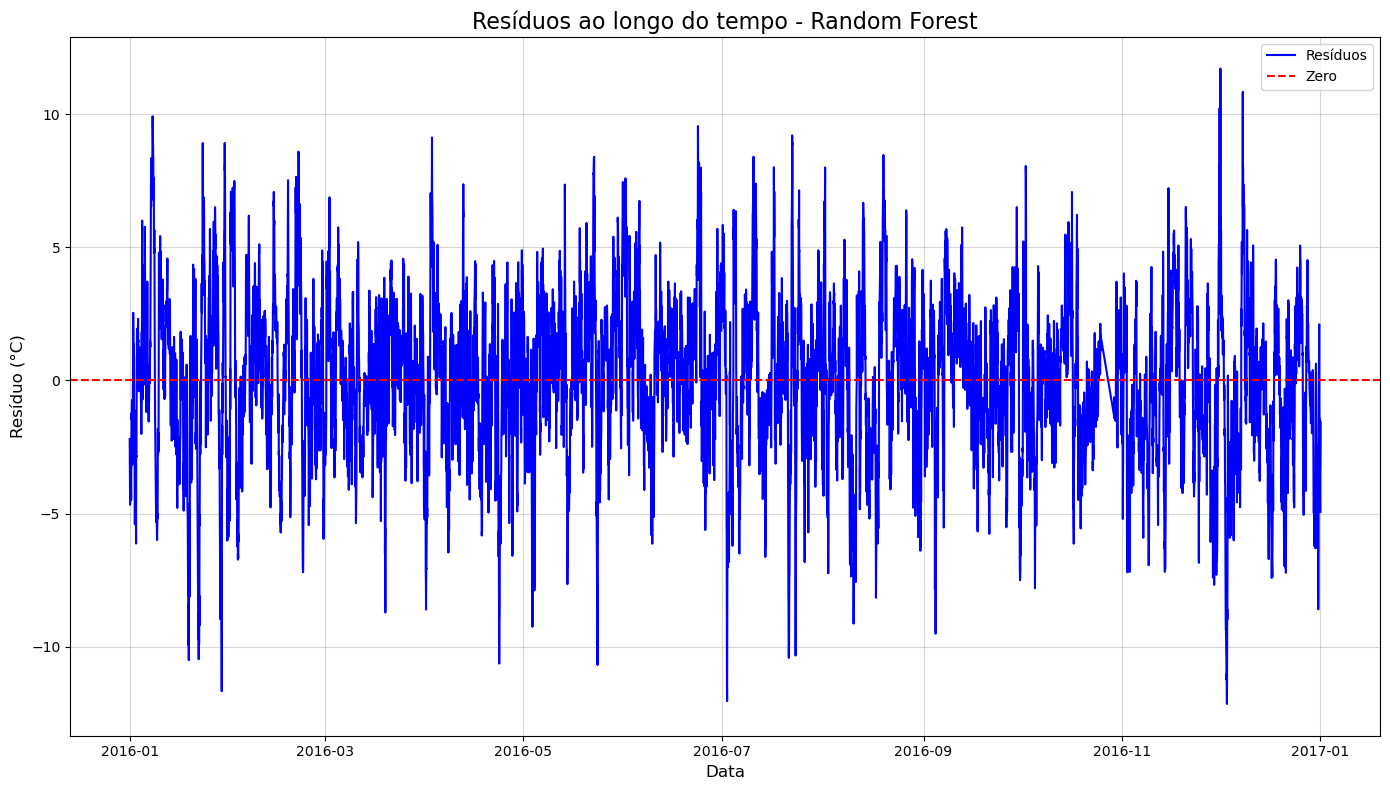

In [107]:
# Plotando o gráfico de linha dos resíduos (base de teste)
plt.figure(figsize=(14, 8))

sns.lineplot(x='Data_Hora_Mais_24h', 
             y='Residuos', 
             data=base_teste, 
             color='blue', 
             label='Resíduos')

plt.axhline(y=0, 
            color='red', 
            linestyle='--', 
            label='Zero')

plt.title('Resíduos ao longo do tempo - Random Forest', 
          fontsize=16)
plt.xlabel('Data', 
           fontsize=12)
plt.ylabel('Resíduo (°C)', 
           fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

Nesse gráfico, há indicação de que o modelo Random Forest está se comportando bem, pois os resíduos estão distribuídos aleatoriamente, sem padrões claros.

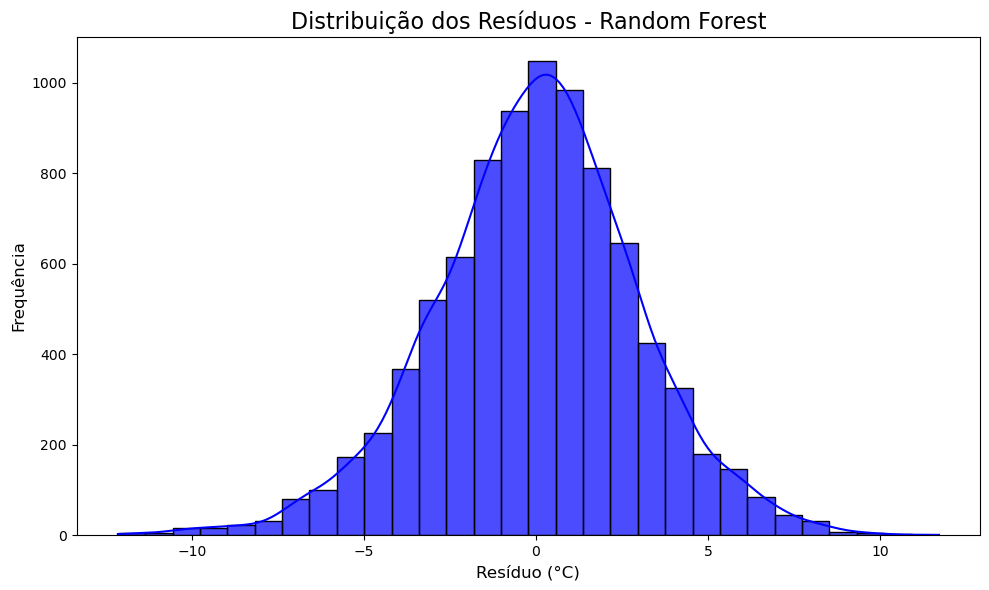

In [108]:
# Histograma da distribuição dos resíduos
# (com a linha de densidade)
plt.figure(figsize=(10, 6))

sns.histplot(base_teste['Residuos'], 
             bins=30, 
             kde=True, 
             color='blue', 
             alpha=0.7)

plt.title('Distribuição dos Resíduos - Random Forest', 
          fontsize=16)
plt.xlabel('Resíduo (°C)',
           fontsize=12)
plt.ylabel('Frequência',
           fontsize=12)

plt.tight_layout()
plt.show()

O histograma acima é parecido com o histograma das Médias Móveis. Então, aplica-se o mesmo teste estatístico.

In [110]:
# Aplicando o teste de Shapiro-Wilk
estatistica, p_valor = shapiro(base_teste['Residuos'])
print('Estatística do teste:', estatistica)
print('p-valor:', p_valor)

# Validando o p-valor com nível de significância de 5%
if p_valor > 0.05:
    print("\nLogo, os resíduos seguem uma distribuição normal.")
else:
    print("\nLogo, os resíduos não seguem uma distribuição normal.")


Estatística do teste: 0.9958154490406892
p-valor: 3.836700701067913e-15

Logo, os resíduos não seguem uma distribuição normal.


O teste aplicado rejeitou as suposições realizadas anteriormente, evidenciando que os resíduos não seguem uma distribuição normal. Como o modelo proposto não utiliza esse requisito para poder ser usado, esse resultado não influencia nas tomadas de decisões e na sua aplicabilidade.

### 9.2.8 Seleção de variáveis importantes - Random Forest

Pode-se extrair as importâncias das variáveis do modelo Random Forest e associá-las aos nomes das colunas usadas nos dados de treino. Para isso, o atributo "feature_importances_" é aplicado no modelo e retorna a importância relativa de cada variável utilizada durante o treinamento. Essa importância é um número entre $0$ e $1$ que reflete o quanto cada variável contribuiu para a redução do erro do modelo. O resultado é um vetor de números, no qual cada posição corresponde à importância de uma variável.

In [111]:
# Extraindo as variáveis mais importantes
variaveis_import = modelo_rf.feature_importances_

# Obtendo os nomes das variáveis - dados treino
nomes_variaveis = X_treino.columns

In [112]:
# Observando os resultados 
variaveis_import

array([0.85083726, 0.02580067, 0.00384533, 0.00373121, 0.0064694 ,
       0.00439351, 0.0034497 , 0.00665709, 0.00328907, 0.00362328,
       0.00978066, 0.00792867, 0.00807588, 0.0158318 , 0.01618499,
       0.01904438, 0.01105708])

Assim, plota-se um gráfico de barras mostrando quais variáveis foram mais relevantes para o modelo.

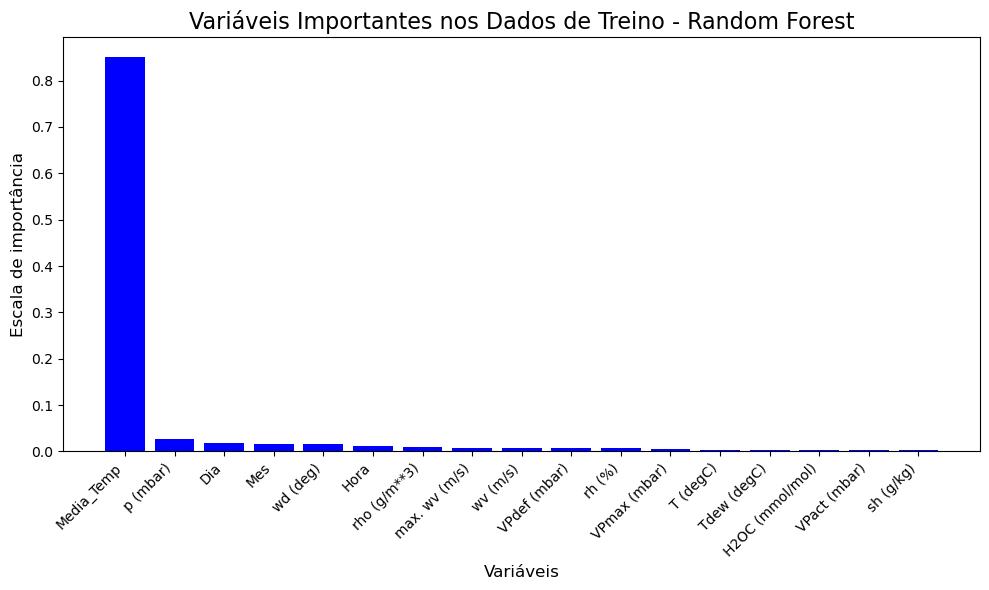

In [113]:
# Organizando as variáveis importantes (ordem descrescente)
ordem_variaveis = np.argsort(variaveis_import)[::-1]

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))

plt.bar(range(X_treino.shape[1]), 
        variaveis_import[ordem_variaveis], 
        align = 'center', 
        color = 'blue')

plt.xticks(range(X_treino.shape[1]), 
           nomes_variaveis[ordem_variaveis], 
           rotation=45, 
           ha='right')
plt.title('Variáveis Importantes nos Dados de Treino - Random Forest', 
          fontsize=16)
plt.xlabel('Variáveis', 
           fontsize=12)
plt.ylabel('Escala de importância', 
           fontsize=12)

plt.tight_layout()
plt.show()

Analisando o gráfico acima, é notado que a variável que mais contribuiu para a performance do modelo foi a "Media_Temp", ou seja, a média da temperatura por hora, com relevância de $0.85$. Depois, seguem as demais variáveis, com a segunda apresentando uma relevância de $0.025$, o que é muito baixo.

## 9.3 Otimização de hiperparâmetros

Também é possível avaliar a performance de um modelo de forma mais robusta e confiável através da **validação cruzada**. Quando um modelo é treinado, ele pode "memorizar" os dados desse treino e apresentar um ótimo desempenho, mas falhar em dados novos (overfitting). Dessa forma, a validação cruzada simula cenários onde o modelo é treinado com diferentes subconjuntos dos dados e avaliado em outros. Isso mede a capacidade do modelo de generalizar para dados desconhecidos.

In [118]:
# Iniciando o "TimeSeriesSplit" com 5 divisões
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Iniciando o "RandomForestRegressor"
rf = RandomForestRegressor(random_state=42)

O "TimeSeriesSplit" é uma classe do Scikit-Learn usada para realizar **validação cruzada** em dados temporais. Diferente da validação cruzada tradicional, onde os dados podem ser embaralhados, no caso de séries temporais é fundamental manter a ordem cronológica.

Para utilizar essa classe, define-se quantas divisões a validação cruzada irá usar, no qual cada divisão terá uma porção maior de dados para o treino e uma menor para o teste, sempre respeitando a sequência do tempo.

A cada divisão, os dados mais antigos são usados para o treino, enquanto que os dados subsequentes (mais recentes) são usados para teste. Isso ajuda a simular previsões futuras baseadas em eventos passados.

Durante a escolha de hiperparâmetros, também conhecida como "tuning de modelos", a validação cruzada é aplicada para comparar modelos e configurações diferentes, selecionando a melhor com base no desempenho médio das divisões ("splits").

In [119]:
# Criando um dicionário para ajuste do modelo
dicionario_ajuste = {'n_estimators': [100, 200, 500], # quantidade de árvores que serão testadas
                     'max_depth': [5, 10, 20, None], # profundidade máxima de cada árvore
                     'min_samples_split': [2, 5, 10], # quantidade mínima de amostras para dividir um nó
                     'min_samples_leaf': [1, 2, 4]} # quantidade mínima de amostras em um nó folha

In [120]:
# Fazendo uma busca aleatória
busca_aleatoria = RandomizedSearchCV(
    estimator=rf,
    param_distributions=dicionario_ajuste,
    n_iter=50,  # número de combinações do espaço de busca (108 no total)
    cv=tscv,    # validação cruzada
    scoring='neg_mean_absolute_error', # métrica que escolhe qual o melhor modelo de todos testados
    verbose=2, # mensagens
    n_jobs=-1, # utiliza todos os núcleos (roda em paralelo)
    random_state=42)

# Ajuste do modelo
busca_aleatoria.fit(X_treino, y_treino)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=RandomForestRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

Para a amostragem de hiperparâmetros, foi utilizado o "RandomizedSearchCV", que é considerado mais eficiente que o "GridSearchCV", pois testa uma amostra aleatória de combinações de hiperparâmetros, economizando tempo em conjuntos de dados grandes ou quando há muitos hiperparâmetros a serem explorados.

Após o ajuste, obtem-se alguns resultados, como os melhores hiperparâmetros encontrados, o modelo final ajustado com os melhores hiperparâmetros e os detalhes da avaliação de todas as combinações testadas.

In [121]:
# Obtendo os melhores hiperparâmetros
hiperparametros_rf =  busca_aleatoria.best_params_

# Obtendo a melhor pontuação (MAE)
mae_rfo_treino = -busca_aleatoria.best_score_

# Obtendo o melhor estimador
melhor_estimador_rf = busca_aleatoria.best_estimator_

In [122]:
# Mostrando os resultados
print("Melhores hiperparâmetros: ", hiperparametros_rf)
print("Melhor métrica (MAE) - treino: ", mae_rfo_treino)
print("Melhor estimador: ", melhor_estimador_rf)

Melhores hiperparâmetros:  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Melhor métrica (MAE) - treino:  2.534017191727449
Melhor estimador:  RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500, random_state=42)


Com base na busca aleatória, os melhores hiperparâmetros são:

* quantidade de árvores testadas: 500;
* profundidade máxima de cada árvore: 10;
* quantidade mínima de amostras para dividir um nó: 10;
* quantidade mínima de amostras em um nó folha: 4.

### 9.3.1 Aplicação da métrica MAE - Random Forest Otimizado

In [123]:
# Calculando o MAE com o melhor estimador
mae_rfo_teste = mean_absolute_error(y_teste, melhor_estimador_rf.predict(X_teste))

# Mostrando o resultado obtido
print(f"MAE (Mean Absolute Error) Base Teste: {mae_rfo_teste:.2f}")

MAE (Mean Absolute Error) Base Teste: 2.26


In [124]:
# Adicionando a coluna na base de teste com 
# os resultados obtidos por meio do melhor estimador
base_teste['y_pred_otimizado'] =  melhor_estimador_rf.predict(X_teste)

In [125]:
# Selecionando apenas a última data
rf_ultima_data = rf_ultima_data[rf_ultima_data[
    'Data_Hora_Mais_24h'] >= '2017-01-01 01:00:00']

In [126]:
# Adicionando a coluna na tabela da última data com 
# os resultados obtidos por meio do melhor estimador
rf_ultima_data['y_pred_otimizado'] =  melhor_estimador_rf.predict(
    rf_ultima_data.drop(columns = ['Data_Hora_Mais_24h', 'y_pred', 'Media_Temp_24h']))

### 9.3.2 Gráfico de linhas do Modelo Random Forest Otimizado

In [127]:
# Juntando as tabelas com os dados de teste e com a última data
dados_plot_rf_otim = pd.concat([base_teste, rf_ultima_data])

In [128]:
# Visualizando os dados preditos
dados_plot_rf_otim.head()

,Media_Temp,Data_Hora_Mais_24h,Media_Temp_24h,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Mes,Dia,Hora,y_pred,Residuos,y_pred_otimizado
61342,-0.563333,2016-01-01 00:00:00,0.025000,997.32,-0.45,-4.69,72.90,5.91,4.31,1.60,2.69,4.32,1271.91,3.05,4.89,178.2,12,31,0,2.220867,-2.195867,1.909129
61343,-0.373333,2016-01-01 01:00:00,-0.496667,996.61,-0.47,-5.57,68.23,5.90,4.03,1.88,2.52,4.04,1271.21,3.89,5.61,179.5,12,31,1,2.412700,-2.909367,1.973381
61344,-0.168333,2016-01-01 02:00:00,-1.085000,996.35,-0.34,-6.15,64.64,5.96,3.85,2.11,2.41,3.87,1270.34,2.63,3.85,177.6,12,31,2,2.525767,-3.610767,2.249133
61345,0.158333,2016-01-01 03:00:00,-1.796667,995.91,0.35,-6.92,57.96,6.27,3.63,2.63,2.27,3.65,1266.71,5.21,7.41,173.0,12,31,3,2.869483,-4.666150,2.629399
61346,-0.131667,2016-01-01 04:00:00,-1.943333,995.42,0.04,-6.99,58.97,6.12,3.61,2.51,2.26,3.63,1267.55,4.66,7.05,176.4,12,31,4,1.947917,-3.891250,2.214362


In [129]:
# Visualizando os dados preditos
dados_plot_rf_otim.tail()

,Media_Temp,Data_Hora_Mais_24h,Media_Temp_24h,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Mes,Dia,Hora,y_pred,Residuos,y_pred_otimizado
20,-2.503333,2017-01-01 20:00:00,NaN,1001.47,-1.52,-7.13,65.42,5.46,3.57,1.89,2.22,3.57,1282.60,1.24,1.96,232.00,12,31,20,-1.655900,NaN,-1.253722
21,-2.653333,2017-01-01 21:00:00,NaN,1001.29,-3.09,-7.09,73.70,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50,12,31,21,-1.855517,NaN,-0.930424
22,-3.553333,2017-01-01 22:00:00,NaN,1000.70,-2.59,-7.04,71.30,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15,12,31,22,-1.876900,NaN,-1.839878
23,-3.746667,2017-01-01 23:00:00,NaN,1000.21,-3.76,-7.95,72.50,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70,12,31,23,-2.269783,NaN,-1.407998
24,-4.820000,2017-01-02 00:00:00,NaN,999.82,-4.82,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.90,1,1,0,-3.626433,NaN,-3.971091


In [130]:
# Criando uma tabela com os dias 30 e 31/12/2016
# e com o dia 01/01/2017
rf_otim_dados_preditos_dez = dados_plot_rf_otim[dados_plot_rf_otim[
    'Data_Hora_Mais_24h'] >= '2016-12-30']

# Visualizando
rf_otim_dados_preditos_dez.tail(2)

,Media_Temp,Data_Hora_Mais_24h,Media_Temp_24h,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Mes,Dia,Hora,y_pred,Residuos,y_pred_otimizado
23,-3.746667,2017-01-01 23:00:00,NaN,1000.21,-3.76,-7.95,72.5,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.7,12,31,23,-2.269783,NaN,-1.407998
24,-4.820000,2017-01-02 00:00:00,NaN,999.82,-4.82,-8.42,75.7,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9,1,1,0,-3.626433,NaN,-3.971091


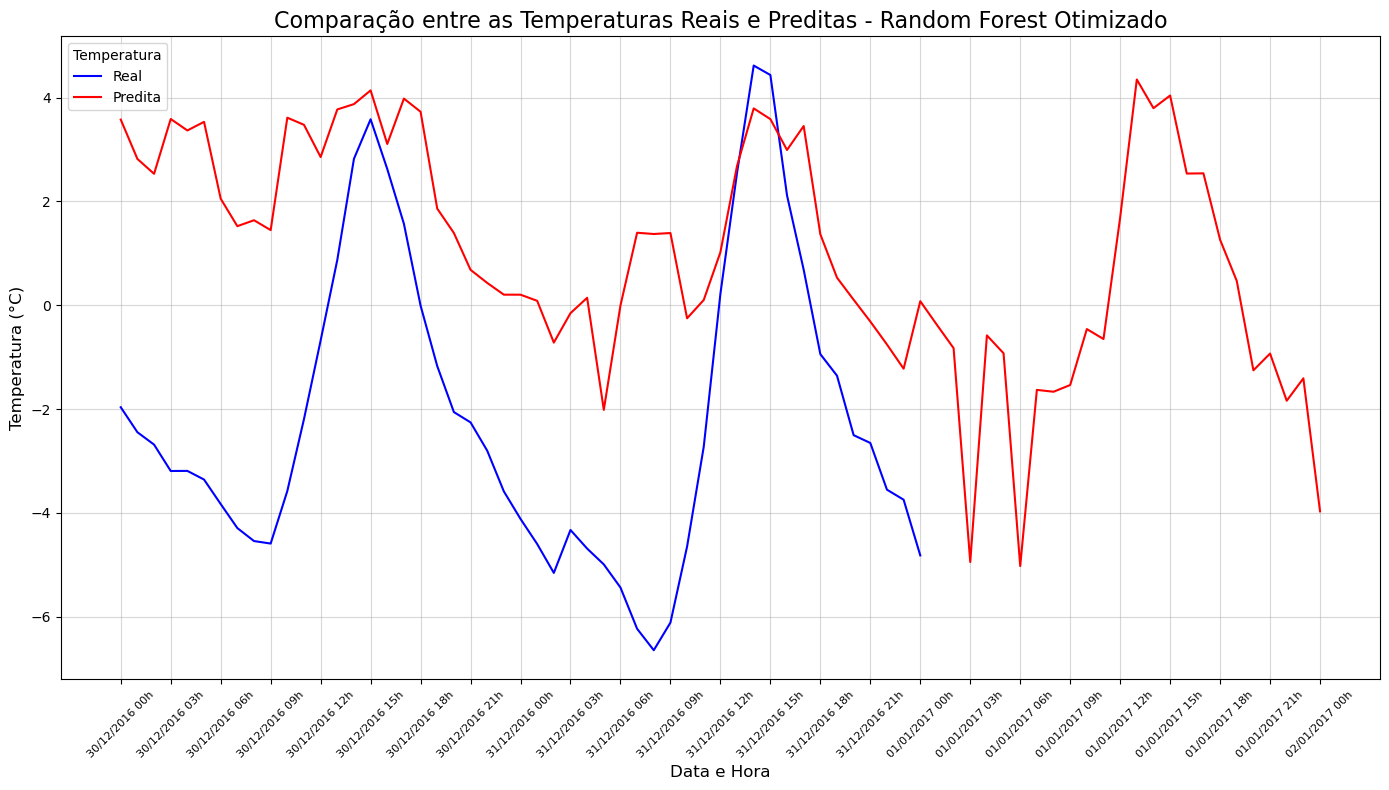

In [131]:
# Configurando o eixo "x" 
rf_otim_data_inicial = rf_otim_dados_preditos_dez['Data_Hora_Mais_24h'].min()  
rf_otim_data_final = rf_otim_dados_preditos_dez['Data_Hora_Mais_24h'].max() 
rf_otim_datas_especificas = pd.date_range(start=rf_otim_data_inicial, 
                                          end=rf_otim_data_final, 
                                          freq='3h')  

# Plotando o gráfico de linhas com as previsões
plt.figure(figsize=(14, 8))

plt.plot(rf_otim_dados_preditos_dez['Data_Hora_Mais_24h'], 
         rf_otim_dados_preditos_dez['Media_Temp_24h'], 
         color="blue", 
         label="Real")

plt.plot(rf_otim_dados_preditos_dez['Data_Hora_Mais_24h'], 
         rf_otim_dados_preditos_dez['y_pred_otimizado'], 
         color="red", 
         label="Predita")

plt.xticks(ticks=rf_otim_datas_especificas, 
           labels=[data.strftime('%d/%m/%Y %Hh') 
                   for data in rf_otim_datas_especificas],
           rotation=45,
           fontsize=8)

plt.title('Comparação entre as Temperaturas Reais e Preditas - Random Forest Otimizado', 
          fontsize=16)
plt.xlabel('Data e Hora', 
           fontsize=12)
plt.ylabel('Temperatura (°C)', 
           fontsize=12)
plt.grid(alpha=0.5)
plt.legend(title='Temperatura', 
           fontsize=10, 
           loc='upper left')

plt.tight_layout()
plt.show()

Com base no gráfico de linhas acima, foram definidas datas a partir do dia 30 de dezembro de 2016. A linha em azul representa as temperaturas reais, ou seja, as temperaturas fornecidas no conjunto de dados. Já a linha vermelha, retrata as temperaturas preditas pelo Modelo Random Forest Otimizado. É observado que os valores preditos para o primeiro dia de janeiro de 2017 se assemelham com os valores reais do dia anterior, atingindo o pico entre $13h$ e $15h$, como já foi observado anteriormente.

### 9.3.3 Análise dos resíduos - Random Forest Otimizado

Seguem os mesmos passos realizados anteriormente para a análise dos resíduos.

In [132]:
# Calculando os resíduos
base_teste['Residuos'] = base_teste['Media_Temp_24h'] - base_teste['y_pred_otimizado']

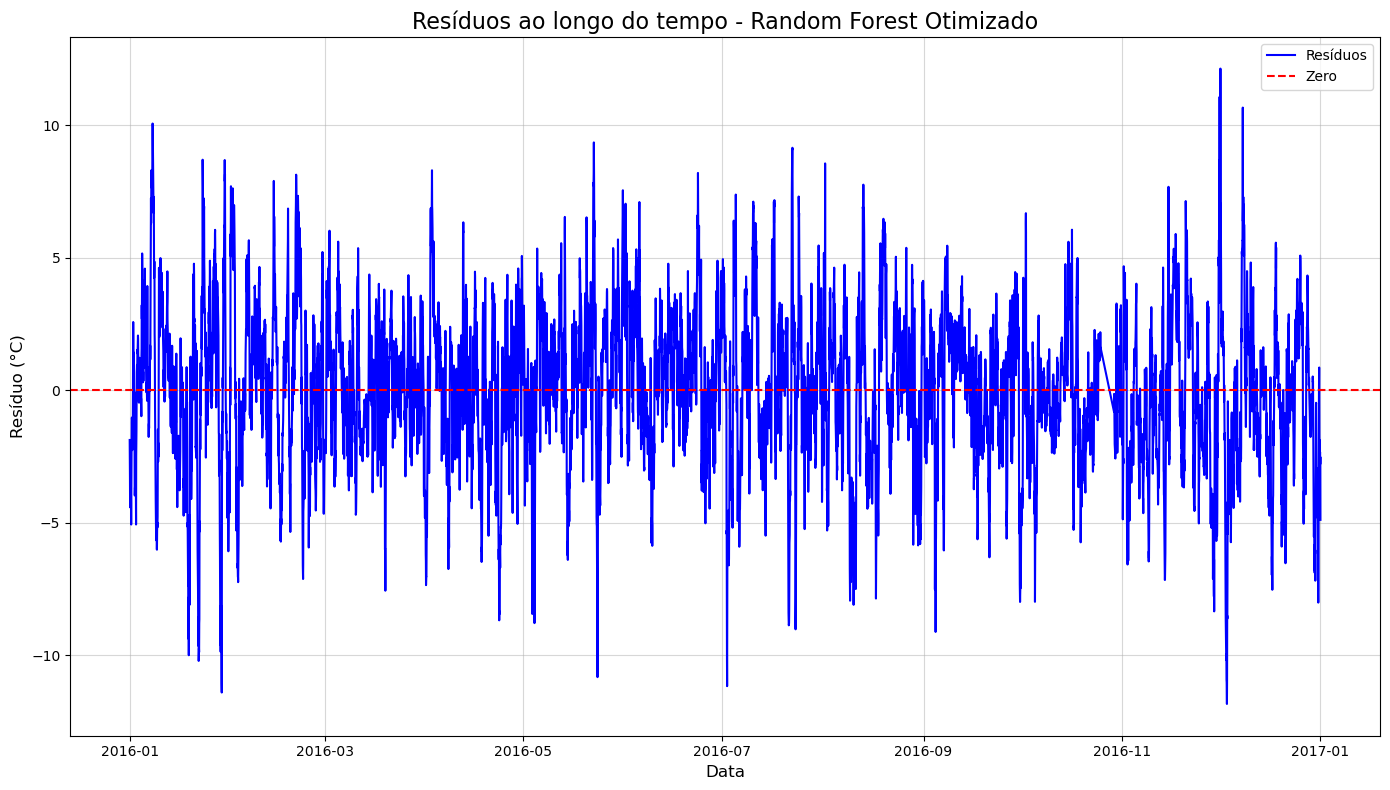

In [133]:
# Plotando o gráfico de linha dos resíduos (base de teste)
plt.figure(figsize=(14, 8))

sns.lineplot(x='Data_Hora_Mais_24h', 
             y='Residuos', 
             data=base_teste, 
             color='blue', 
             label='Resíduos')

plt.axhline(y=0, 
            color='red', 
            linestyle='--', 
            label='Zero')

plt.title('Resíduos ao longo do tempo - Random Forest Otimizado', 
          fontsize=16)
plt.xlabel('Data', 
           fontsize=12)
plt.ylabel('Resíduo (°C)', 
           fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

Nesse gráfico, há indicação de que o modelo Random Forest Otimizado está se comportando bem, pois os resíduos estão distribuídos aleatoriamente, sem padrões claros, oscilando ao redor do zero.

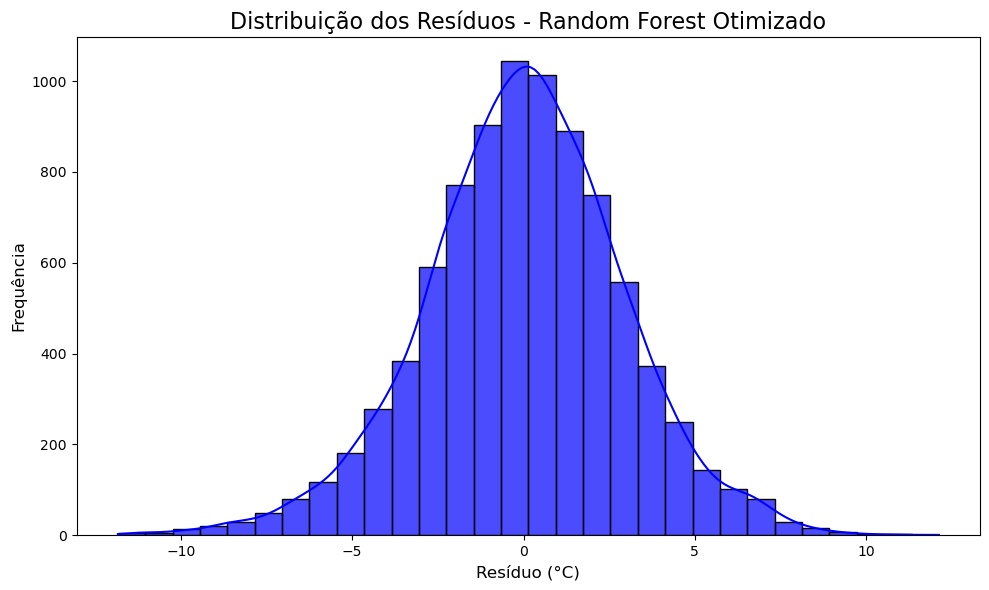

In [134]:
# Histograma da distribuição dos resíduos
# (com a linha de densidade)
plt.figure(figsize=(10, 6))

sns.histplot(base_teste['Residuos'], 
             bins=30, 
             kde=True, 
             color='blue', 
             alpha=0.7)

plt.title('Distribuição dos Resíduos - Random Forest Otimizado', 
          fontsize=16)
plt.xlabel('Resíduo (°C)',
           fontsize=12)
plt.ylabel('Frequência',
           fontsize=12)

plt.tight_layout()
plt.show()

O histograma acima é parecido com os histogramas anteriores. Logo, aplica-se o mesmo teste estatístico que os demais.

In [135]:
# Aplicando o teste de Shapiro-Wilk
estatistica, p_valor = shapiro(base_teste['Residuos'])
print('Estatística do teste:', estatistica)
print('p-valor:', p_valor)

# Validando o p-valor com nível de significância de 5%
if p_valor > 0.05:
    print("\nLogo, os resíduos seguem uma distribuição normal.")
else:
    print("\nLogo, os resíduos não seguem uma distribuição normal.")


Estatística do teste: 0.9958460487891073
p-valor: 4.477216905742729e-15

Logo, os resíduos não seguem uma distribuição normal.


O teste aplicado rejeitou as suposições realizadas anteriormente, evidenciando que o modelo não segue uma distribuição normal. Como o modelo proposto não utiliza esse requisito para poder ser usado, esse resultado não influencia nas tomadas de decisões e na sua aplicabilidade.

### 9.3.4 Seleção de variáveis importantes - Random Forest Otimizado

In [136]:
# Extraindo as variáveis mais importantes
variaveis_import_otim = melhor_estimador_rf.feature_importances_

# Obtendo os nomes das variáveis - dados treino
nomes_variaveis_otim = X_treino.columns

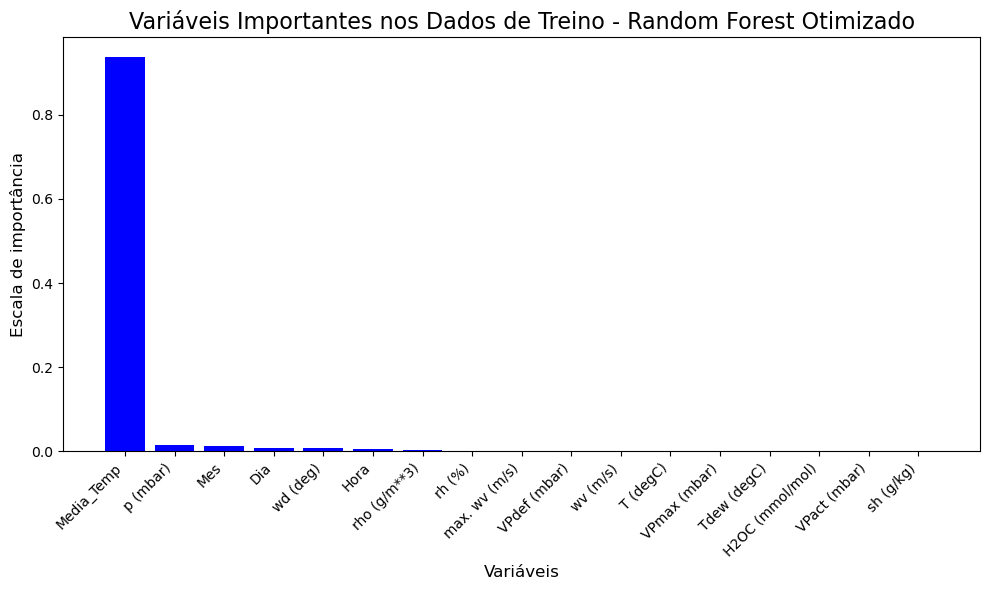

In [137]:
# Organizando as variáveis importantes (ordem descrescente)
ordem_variaveis_otim = np.argsort(variaveis_import_otim)[::-1]

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))

plt.bar(range(X_treino.shape[1]), 
        variaveis_import_otim[ordem_variaveis_otim], 
        align = 'center', 
        color = 'blue')

plt.xticks(range(X_treino.shape[1]), 
           nomes_variaveis_otim[ordem_variaveis_otim], 
           rotation=45, 
           ha='right')
plt.title('Variáveis Importantes nos Dados de Treino - Random Forest Otimizado', 
          fontsize=16)
plt.xlabel('Variáveis', 
           fontsize=12)
plt.ylabel('Escala de importância', 
           fontsize=12)

plt.tight_layout()
plt.show()

Analisando o gráfico acima, é notado que a variável que mais contribuiu para a performance do modelo foi a "Media_Temp", ou seja, a média da temperatura por hora. Depois, seguem as demais variáveis, com a pressão atmosférica em segundo lugar, porém com um valor de importância muito baixo.

# 10. Conclusão final sobre os modelos propostos

## 10.1 Em relação ao custo operacional

Realizado esse estudo, pode-se concluir que, em questão de custo computacional, o Modelo de Médias Móveis apresentou um melhor desempenho, pois o tempo de execução do código foi baixo (quase instantâneo) e a métrica MAE foi de $2.55\text{°C}$. O Modelo Random Forest ocupa o segundo lugar nesse quesito, visto que o tempo necessário para a execução do código no ajuste dos dados foi de aproximamente dois minutos, resultando em um erro médio absoluto de $2.31\text{°C}$. Já o Modelo Random Forest com Hiperparâmetros Otimizados apresentou um custo operacional bastante elevado, cerca de duas horas. Além disso, sua métrica não diferiu significativamente do modelo anterior, gerando um resultado de $2.26\text{°C}$. 

**Obs.:** os tempos de execução apontados podem variar dependendo da capacidade da máquina utilizada.

## 10.2 Em relação à métrica MAE

Se a decisão de escolha de um modelo for a partir do resultado das métricas obtidas, a ordem de prioridade seria inversa em relação ao custo computacional, sendo: Random Forest com Hiperparâmetros Otimizados ($2.26\text{°C}$), Random Forest ($2.31\text{°C}$) e Modelo de Médias Móveis ($2.55\text{°C}$). 

## 10.3 Em relação à complexidade dos dados

Levando em consideração a complexidade dos dados, o modelo de melhor desempenho foi o Modelo de Médias Móveis, pois os dados não apresentam comportamentos complexos e a média das temperaturas por hora mostrou-se adequada e simples, de fácil interpretação. Como os modelos seguintes também consideraram a média das temperaturas como variável de maior importância, não foi necessário aplicar mais modelos complexos. 

Contudo, se houver grande disponibilidade de tempo para estudo e aplicação, nada impede que novos modelos sejam testados e comparados entre si.

## 10.4 Em relação à captura da sazonalidade

Pode-se concluir que, em relação à captura da sazonalidade, o modelo que apresentou melhor performance foi o Modelo de Médias Móveis, seguido pelo Modelo Random Forest Otimizado e, por último, o Modelo Random Forest.

# 11. Sugestões de outros modelos

Também poderiam ser utilizados outros modelos para a previsão da temperatura para as próximas $24h$ com base nos dados fornecidos. Alguns deles são:

## 11.1 Modelos Estatísticos

* **Regressão Linear:** assume uma relação linear entre variáveis de entrada e saída (testar pressuposições);
* **Regressão Polinomial:** expande a regressão linear adicionando termos polinomiais, podendo capturar relações não lineares simples.

## 11.2 Modelos de Aprendizado de Máquina

* **XGBoost, LightGBM e CatBoost:** constrói árvores de decisão sequenciais, ajustando erros de previsões anteriores, capturando relações complexas, além de ser caracterizado como eficiente em termos de recursos computacionais.

## 11.3 Modelos de Séries Temporais

* **SARIMA:** é uma extensão do modelo ARIMA (AutoRegressive Integrated Moving Average) que considera a sazonalidade.